# Ames Housing Price Prediction

(Last updated 21-November-2021)

This notebook is my latest iteration in building a predictive model for housing prices in the town of Ames, Iowa.<br>
The problem and dataset can be found on Kaggle https://www.kaggle.com/c/home-data-for-ml-course/overview.<br>
At the time of publishing this notebook, my solution was ranked in the top 5% of all submissions.<br>

My solution involves using Random Forest Regression and XGBoost models to predict the prices of the test data.<br>
In arriving at my solution, I perform EDA, apply appropriate data transformation and feature engineering techniques, and finetune hyperparameters.

## Contents

#### 1. Initialisation

#### 2. Exploratory Data Analysis & Feature Engineering
     2.1 EDA on Training Dataset
     2.2 EDA on Numerical Variables
     2.3 EDA on Categorical Variables
     2.4 Feature Engineering and additional EDA insights

#### 3. Predictive Modelling
     3.1 Preprocessing
     3.2 Predicting SalePriceLog using Random Forest Regressor
     3.3 Predicting SalePriceLog using XGBoost
     3.4 Predicting PricePSF using XGBoost
     3.5 Insights/Observations
     
#### 4. Conclusion
     
     

## 1. Initialisation

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.metrics as sklm
import xgboost as xgb
import sklearn.model_selection as ms

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


%matplotlib inline

In [2]:
# load training and test data

test = pd.read_csv("E:/Machine Learning/Kaggle/House Pricing/test.csv")
train = pd.read_csv("E:/Machine Learning/Kaggle/House Pricing/train.csv")

In [3]:
# editing format options

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

## 2. Exploratory Data Analysis & Feature Engineering

#### 2.1 EDA on Training Dataset

In [4]:
# display shape and first rows

print(test.shape)
train.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# sense-check of null values, and numerical and categorical values

dtype = train.dtypes.to_frame(name='DType')
null_count=train.isnull().sum().to_frame(name='Null Count')

features_summary = pd.merge(dtype,null_count,on=dtype.index)
features_summary.sort_values('Null Count',ascending=False)

,key_0,DType,Null Count
72,PoolQC,object,1453
74,MiscFeature,object,1406
6,Alley,object,1369
73,Fence,object,1179
57,FireplaceQu,object,690
3,LotFrontage,float64,259
59,GarageYrBlt,float64,81
64,GarageCond,object,81
58,GarageType,object,81
60,GarageFinish,object,81


In [6]:
#high level view of data

train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

Shapiro Statistic = 0.870, p-value = 0.00000


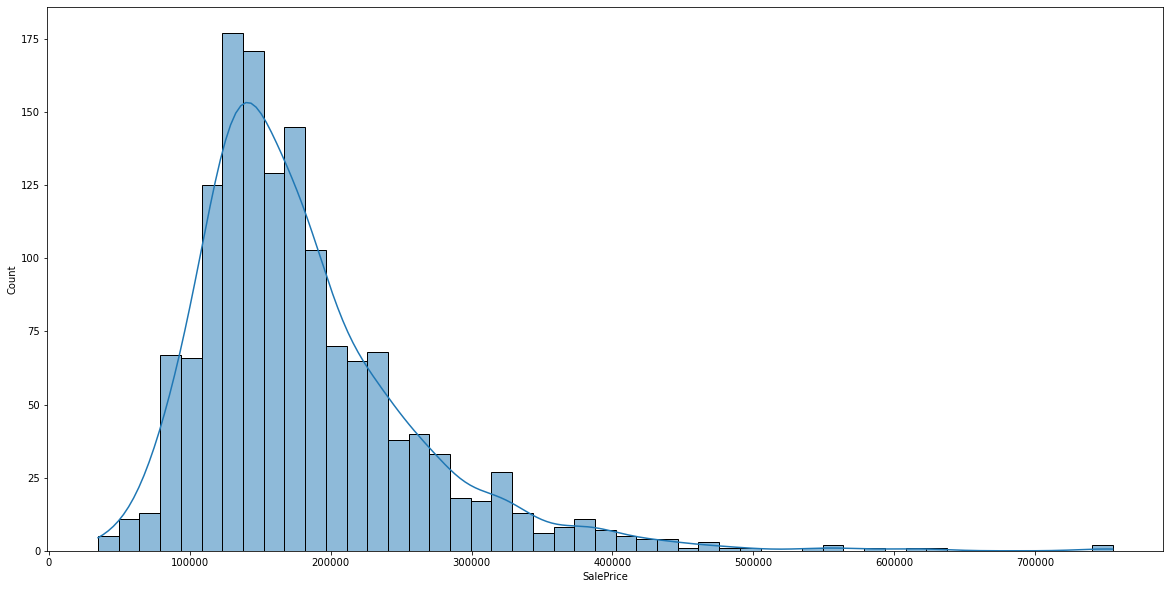

In [7]:
#visualisation of SalePrice

plt.figure(figsize=(20, 10))
sns.histplot(x=train['SalePrice'],kde=True)

from scipy.stats import shapiro

stat, p = shapiro(train['SalePrice'])
print('Shapiro Statistic = %.3f, p-value = %.5f' % (stat,p))

<mark>__Observation:__ The distribution of SalePrice is right-skewed.
Normalising this distribution would likely result in better results in a predictive model.

Shapiro Statistic = 0.991, p-value = 0.00000


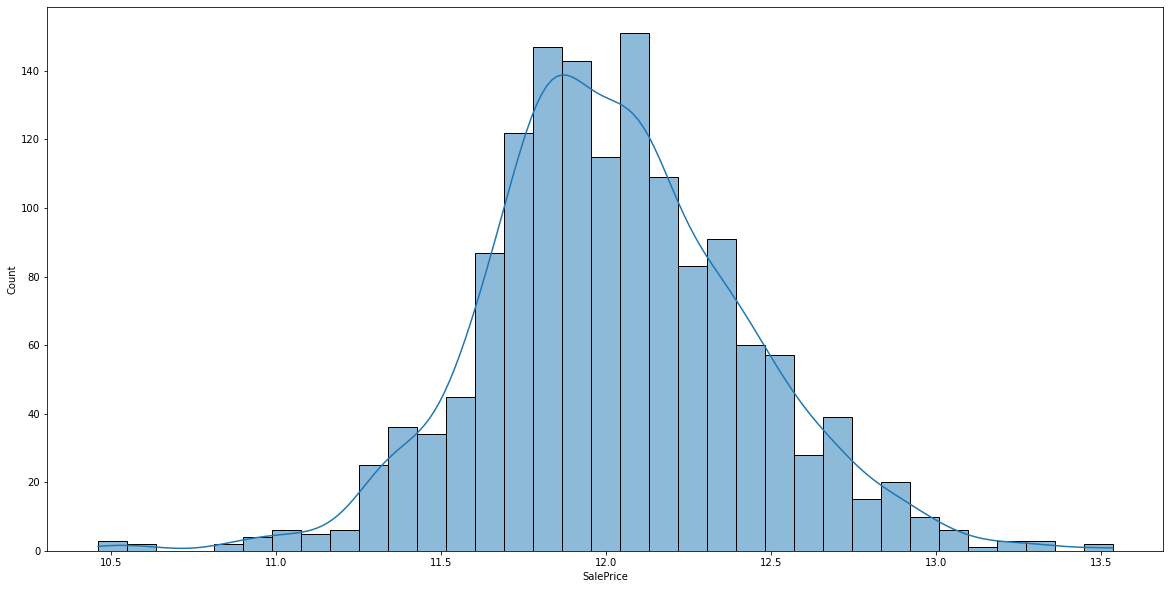

In [8]:
#log transformation of SalePrice

plt.figure(figsize=(20, 10))
sns.histplot(x=np.log(train['SalePrice']),kde=True)

from scipy.stats import shapiro

stat, p = shapiro(np.log(train['SalePrice']))
print('Shapiro Statistic = %.3f, p-value = %.5f' % (stat,p))

<Mark>__Observation:__ Log transformation of SalePrice makes the distribution more normal (as demonstrated by the improvement in the Shapiro value).

<Mark>In reality the Shapiro statistic shows that log-transforming SalePrice is only marginal outperformed by the Box-Cox method, and therefore for ease of use, the log-transformed SalePrice will be used as a target value. 

In [9]:
train['SalePriceLog']=np.log(train['SalePrice'])

#### 2.2 EDA on Numerical Variables

In [10]:
#view of nulls in numerical variable population

features_summary[features_summary['DType']!='object']

,key_0,DType,Null Count
0,Id,int64,0
1,MSSubClass,int64,0
3,LotFrontage,float64,259
4,LotArea,int64,0
17,OverallQual,int64,0
18,OverallCond,int64,0
19,YearBuilt,int64,0
20,YearRemodAdd,int64,0
26,MasVnrArea,float64,8
34,BsmtFinSF1,int64,0


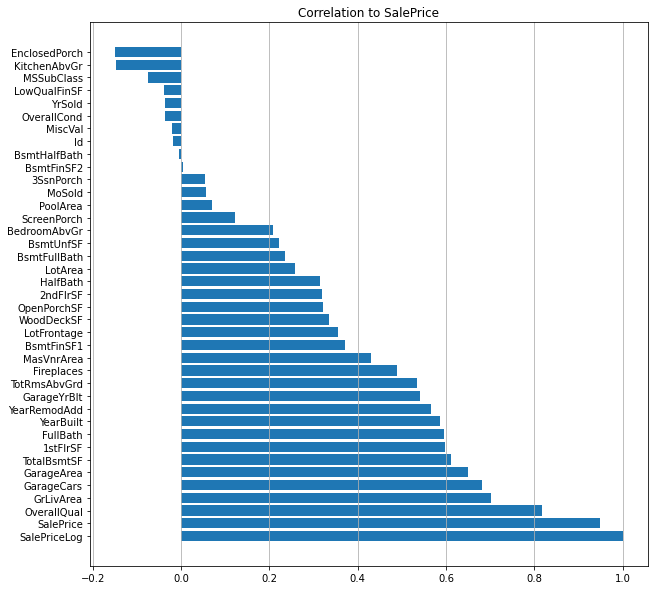

In [11]:
#visualisation of correlation to SalePrice for numerical variables

corr = train.corr()['SalePriceLog'].sort_values(ascending=False).to_frame()

fig,ax=plt.subplots(figsize=(10,10))

ax.barh(corr.index,corr['SalePriceLog'])
ax.set_title('Correlation to SalePrice')

plt.grid(axis='x')


<Mark>__Observation:__ It is worth noting the highest correlated variables (i.e. top 10 up to TotRmsAbvGrd) would be valuable features to include within a predictive model:

- OverallQual
- GrLivArea
- GarageCars
- GarageArea (refeatured as EntArea - see further below)
- TotalBsmtSF
- 1stFlrSF
- FullBath
- YearBuilt
- YearRemodAdd
- TotRmsAbvGrd



<Mark>At this stage, hypotheses does not extend so far to say that GarageYrBlt, MasVnrArea and Fireplaces would significantly influence SalePrice, so variables with correlation values lower than these variables (inclusive) will be excluded for now.



<Mark>EntArea(Entertainment Area) is defined as the sum of GarageArea, WoodDeckSF, OpenPorchSF, and PoolArea - 
essentially living space in the property outside of the GrLivArea and TotalBsmtSF.

In [12]:
# Feature-engineer EntArea

train['EntArea'] = train['GarageArea'] + train['WoodDeckSF'] + train['OpenPorchSF']+ train['PoolArea']

<ipython-input-13-837b026e3d6a>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


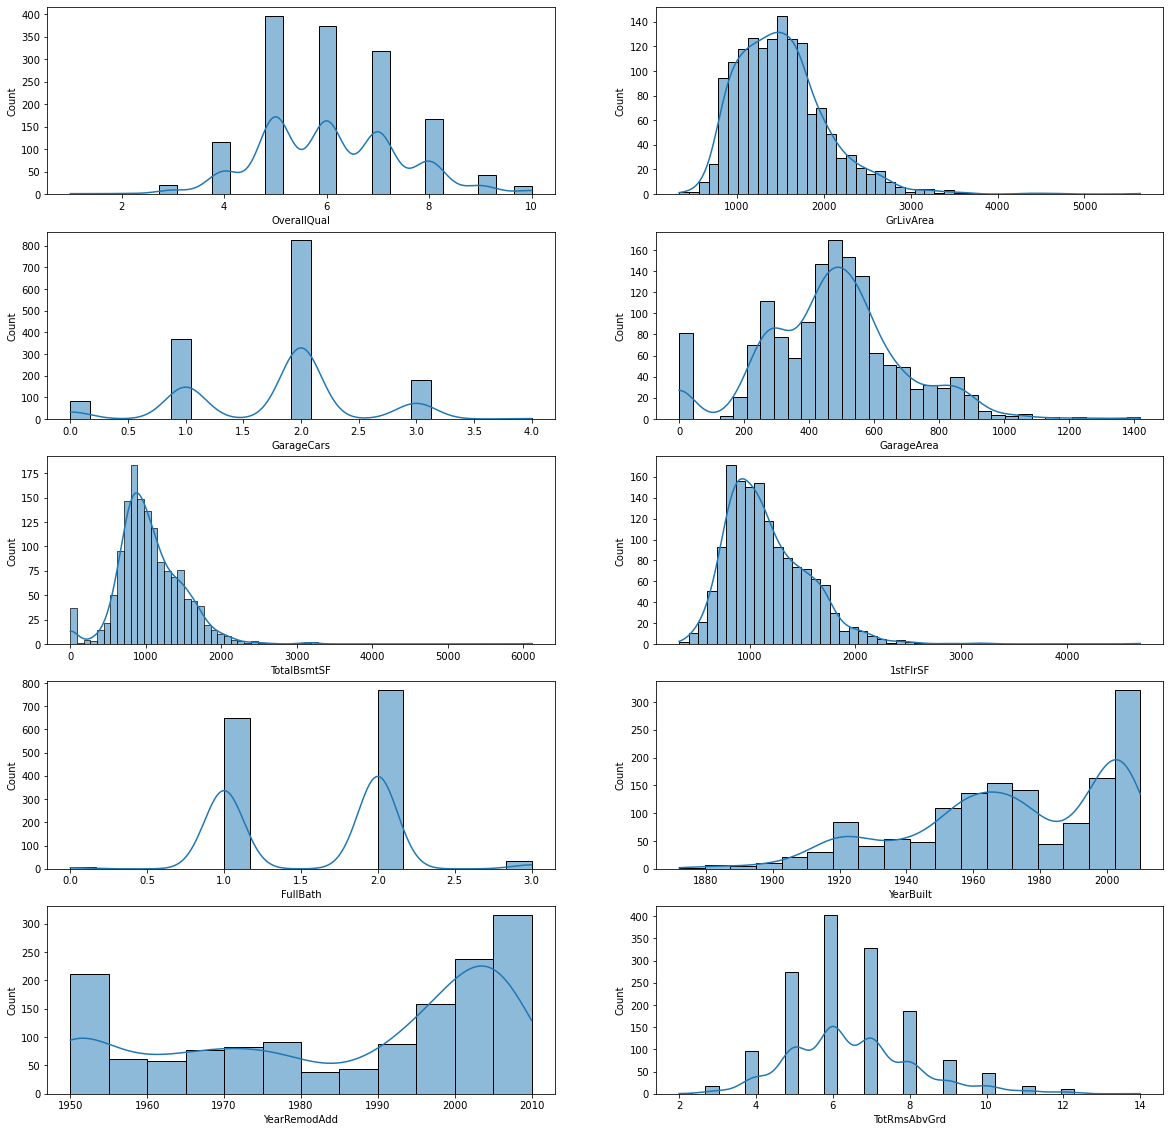

In [13]:
#visualisation of distribution of numerical variables

fig,axs = plt.subplots(5,2,figsize=(20,20))
sns.histplot(train['OverallQual'],kde=True,ax=axs[0,0])
sns.histplot(train['GrLivArea'],kde=True,ax=axs[0,1])
sns.histplot(train['GarageCars'],kde=True,ax=axs[1,0])
sns.histplot(train['GarageArea'],kde=True,ax=axs[1,1])
sns.histplot(train['TotalBsmtSF'],kde=True,ax=axs[2,0])
sns.histplot(train['1stFlrSF'],kde=True,ax=axs[2,1])
sns.histplot(train['FullBath'],kde=True,ax=axs[3,0])
sns.histplot(train['YearBuilt'],kde=True,ax=axs[3,1])
sns.histplot(train['YearRemodAdd'],kde=True,ax=axs[4,0])
sns.histplot(train['TotRmsAbvGrd'],kde=True,ax=axs[4,1])


fig.show()

__Comment:__ Variables will be transformed using the PowerTransformer function to account for non-normal distribution and outliers in the population

<ipython-input-14-de6772680d15>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


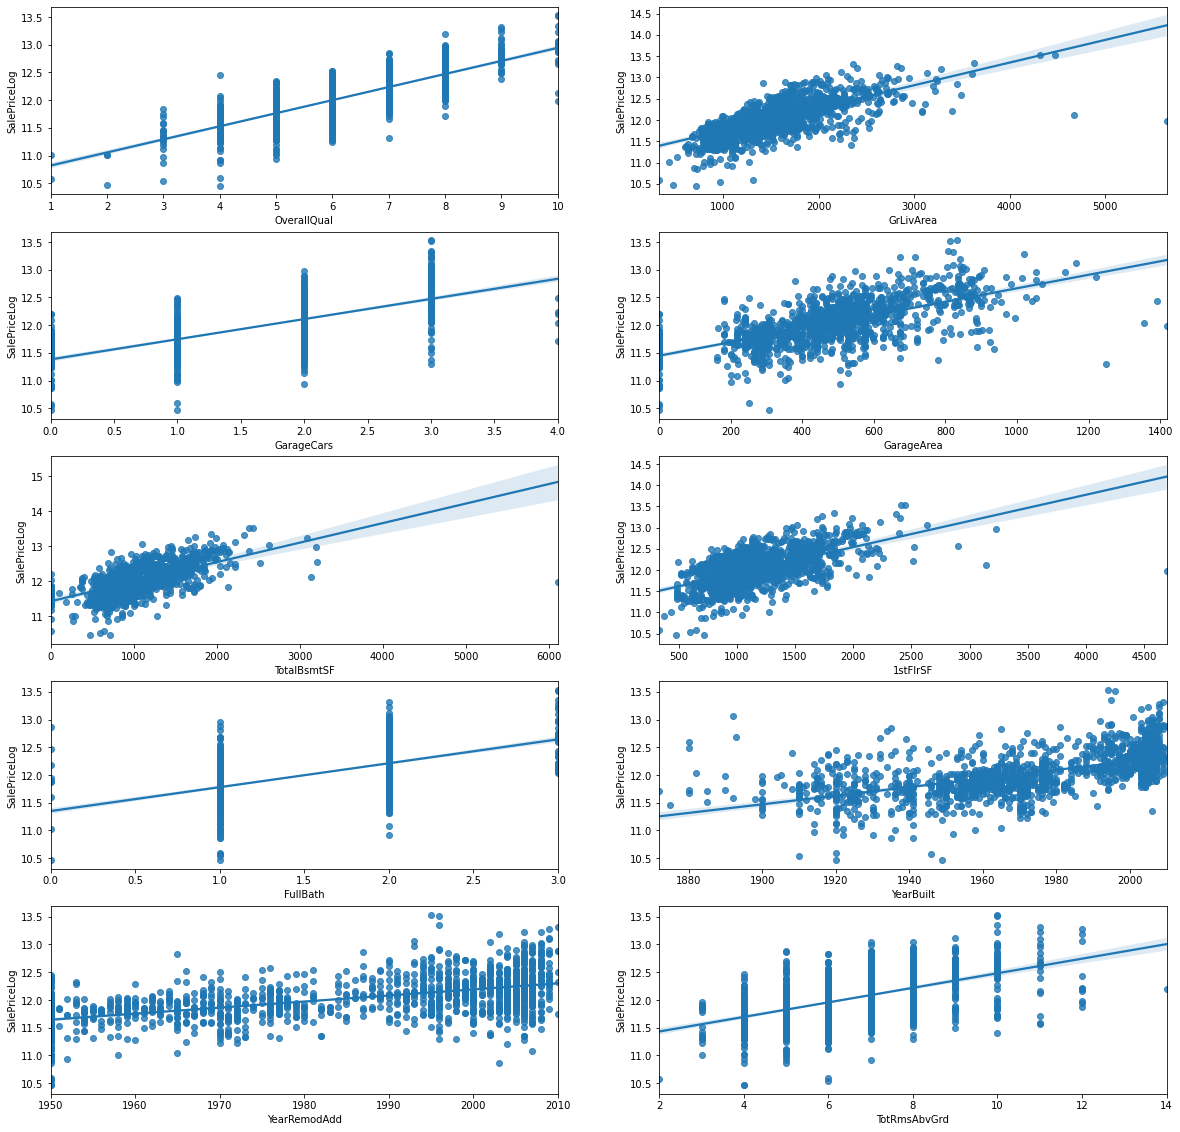

In [14]:
#visualisation of numerical variables vs SalesPrice

fig,axs = plt.subplots(5,2,figsize=(20,20))
sns.regplot(x=train['OverallQual'],y=train['SalePriceLog'],ax=axs[0,0])
sns.regplot(x=train['GrLivArea'],y=train['SalePriceLog'],ax=axs[0,1])
sns.regplot(x=train['GarageCars'],y=train['SalePriceLog'],ax=axs[1,0])
sns.regplot(x=train['GarageArea'],y=train['SalePriceLog'],ax=axs[1,1])
sns.regplot(x=train['TotalBsmtSF'],y=train['SalePriceLog'],ax=axs[2,0])
sns.regplot(x=train['1stFlrSF'],y=train['SalePriceLog'],ax=axs[2,1])
sns.regplot(x=train['FullBath'],y=train['SalePriceLog'],ax=axs[3,0])
sns.regplot(x=train['YearBuilt'],y=train['SalePriceLog'],ax=axs[3,1])
sns.regplot(x=train['YearRemodAdd'],y=train['SalePriceLog'],ax=axs[4,0])
sns.regplot(x=train['TotRmsAbvGrd'],y=train['SalePriceLog'],ax=axs[4,1])


fig.show()

#### 2.3 EDA on Categorical Variables

In [15]:
#summary of categorical variables

features_summary[features_summary['DType']=='object']

,key_0,DType,Null Count
2,MSZoning,object,0
5,Street,object,0
6,Alley,object,1369
7,LotShape,object,0
8,LandContour,object,0
9,Utilities,object,0
10,LotConfig,object,0
11,LandSlope,object,0
12,Neighborhood,object,0
13,Condition1,object,0


__Comment:__ Eyeballing the categorical variables, it was hypothesised that the below features would be interesting to explore further:<br>

- MSZoning
- LandContour
- Neighborhood
- HouseStyle
- ExterQual
- ExterCond
- KitchenQual
- SaleCondition

To note a couple of exceptions:
- BldgType was considered but appears similar in nature to HouseStyle, and deemed less useful, so ultimately not included
- SaleType was considered but appears similar in nature to SaleCondition, and deemed less useful, so ultimately not included


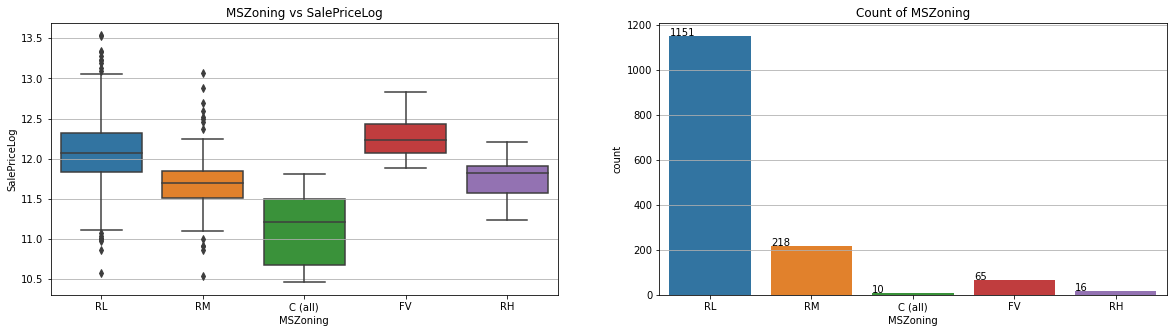

In [16]:
#boxplot visualisation of MSZoning

categorical_feature='MSZoning'

fig,ax = plt.subplots(1,2,figsize=(20,5))
a = sns.boxplot(x=train[categorical_feature],y=train['SalePriceLog'],ax=ax[0])
a.grid(axis='y')
a.set_title('{:s} vs SalePriceLog'.format(categorical_feature))
b = sns.countplot(x=train[categorical_feature],ax=ax[1])
b.grid(axis='y')
b.set_title('Count of {:s}'.format(categorical_feature))
for p in b.patches:
    b.annotate('{:d}'.format(p.get_height()), (p.get_x(), p.get_height()))

__Comment:__ Outliers concentrated in certain categories, and certain values have small sample size. Otherwise the variable appears to influence SalePrice.

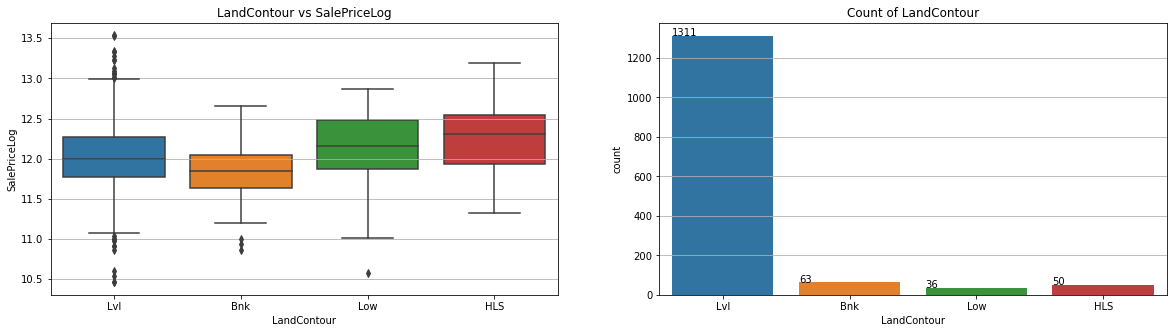

In [17]:
#boxplot visualisation of LandContour

categorical_feature='LandContour'

fig,ax = plt.subplots(1,2,figsize=(20,5))
a = sns.boxplot(x=train[categorical_feature],y=train['SalePriceLog'],ax=ax[0])
a.grid(axis='y')
a.set_title('{:s} vs SalePriceLog'.format(categorical_feature))
b = sns.countplot(x=train[categorical_feature],ax=ax[1])
b.grid(axis='y')
b.set_title('Count of {:s}'.format(categorical_feature))
for p in b.patches:
    b.annotate('{:d}'.format(p.get_height()), (p.get_x(), p.get_height()))

__Comment:__ Outliers concentrated in certain categories, and certain values have small sample size. Otherwise the variable appears to influence SalePrice.

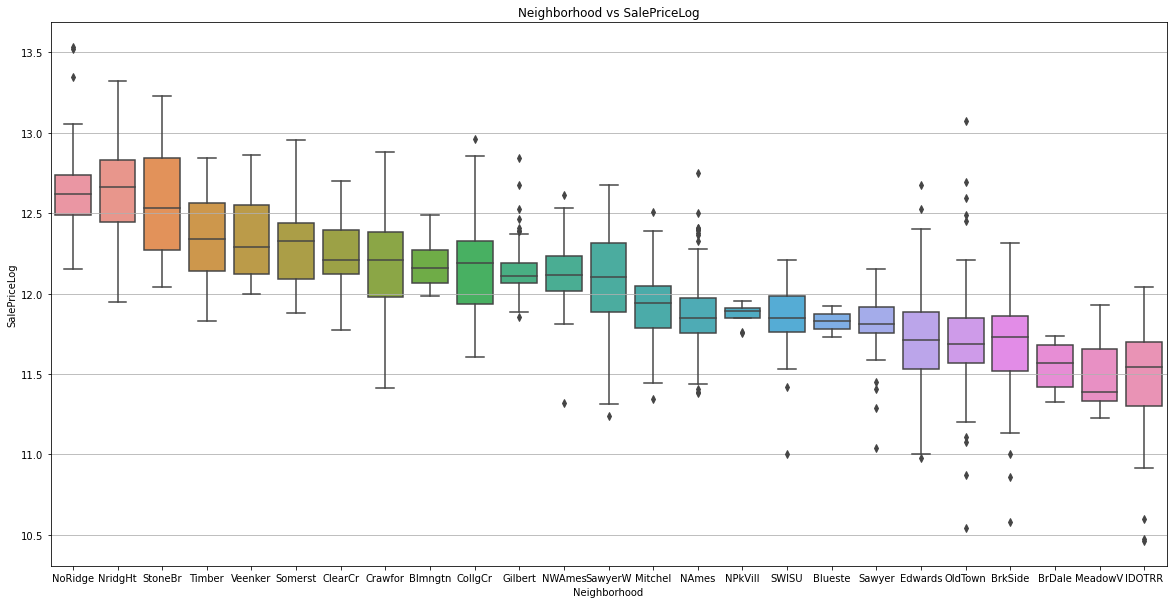

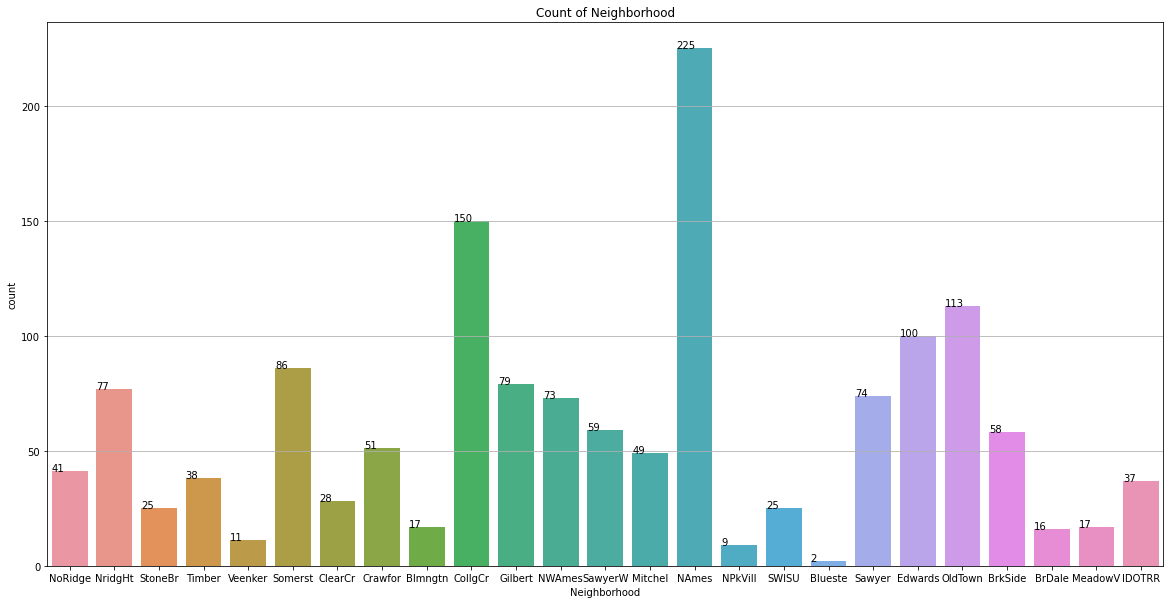

In [18]:
#boxplot visualisation of neighbourhood

neighborhood_rank = train.groupby(['Neighborhood']).mean()['SalePriceLog'].sort_values(ascending=False)

plt.figure(figsize=(20, 10))
plt.grid()
plt.title('Neighborhood vs SalePriceLog')
sns.boxplot(x=train['Neighborhood'],y=train['SalePriceLog'],order=neighborhood_rank.index)
plt.show()

plt.figure(figsize=(20, 10))
plt.grid()
plt.title('Count of Neighborhood')
ax = sns.countplot(x=train['Neighborhood'],order=neighborhood_rank.index)

for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

__Observation:__ Sale Prices clearly differ according to their neighborhoods.

However a few points to note:<br>

- Some neighborhoods (e.g. Blueste) do not have a significant sample size<br>
- Significant outliers are prevalent across numerous neighborhoods.<br>

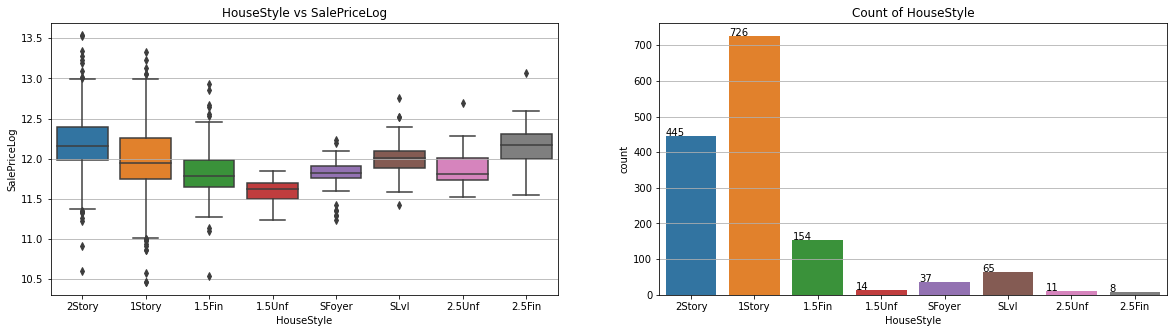

In [19]:
#boxplot visualisation of HouseStyle

categorical_feature='HouseStyle'

fig,ax = plt.subplots(1,2,figsize=(20,5))
a = sns.boxplot(x=train[categorical_feature],y=train['SalePriceLog'],ax=ax[0])
a.grid(axis='y')
a.set_title('{:s} vs SalePriceLog'.format(categorical_feature))
b = sns.countplot(x=train[categorical_feature],ax=ax[1])
b.grid(axis='y')
b.set_title('Count of {:s}'.format(categorical_feature))
for p in b.patches:
    b.annotate('{:d}'.format(p.get_height()), (p.get_x(), p.get_height()))

__Comment:__ Outliers showing across most categories, and certain values have small sample size. Otherwise the variable appears to influence SalePrice.

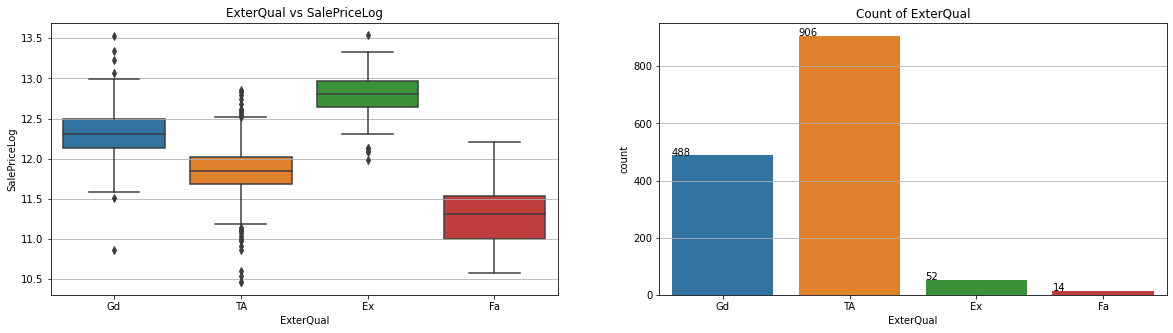

In [20]:
#boxplot visualisation of ExterQual

categorical_feature='ExterQual'

fig,ax = plt.subplots(1,2,figsize=(20,5))
a = sns.boxplot(x=train[categorical_feature],y=train['SalePriceLog'],ax=ax[0])
a.grid(axis='y')
a.set_title('{:s} vs SalePriceLog'.format(categorical_feature))
b = sns.countplot(x=train[categorical_feature],ax=ax[1])
b.grid(axis='y')
b.set_title('Count of {:s}'.format(categorical_feature))
for p in b.patches:
    b.annotate('{:d}'.format(p.get_height()), (p.get_x(), p.get_height()))

__Comment:__ ExterQual is ordinal in nature and will be transformed to reflect this.
    

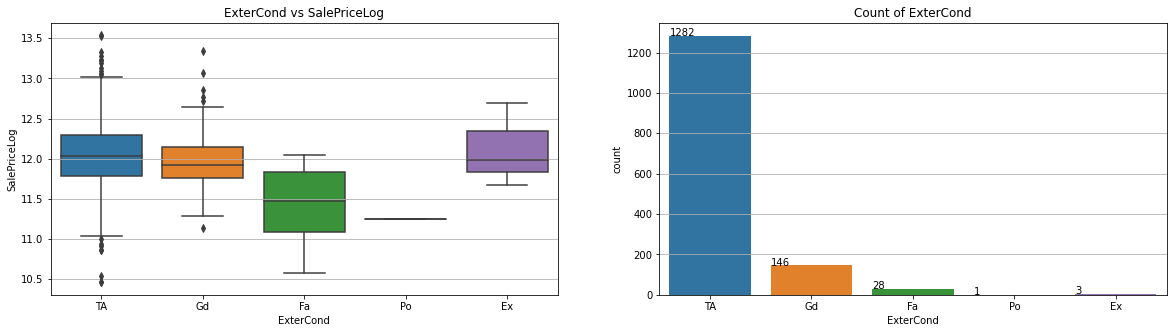

In [21]:
#boxplot visualisation of ExterCond

categorical_feature='ExterCond'

fig,ax = plt.subplots(1,2,figsize=(20,5))
a = sns.boxplot(x=train[categorical_feature],y=train['SalePriceLog'],ax=ax[0])
a.grid(axis='y')
a.set_title('{:s} vs SalePriceLog'.format(categorical_feature))
b = sns.countplot(x=train[categorical_feature],ax=ax[1])
b.grid(axis='y')
b.set_title('Count of {:s}'.format(categorical_feature))
for p in b.patches:
    b.annotate('{:d}'.format(p.get_height()), (p.get_x(), p.get_height()))

__Comment:__ ExterCond is ordinal in nature and will be transformed to reflect this.

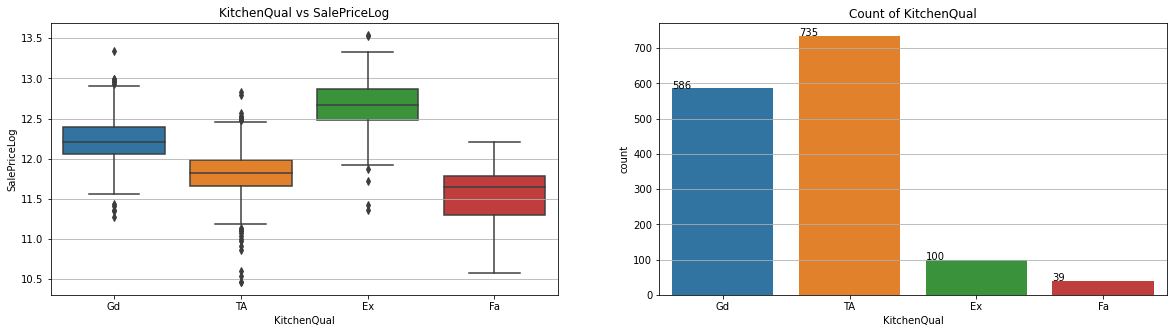

In [22]:
#boxplot visualisation of KitchenQual

categorical_feature='KitchenQual'

fig,ax = plt.subplots(1,2,figsize=(20,5))
a = sns.boxplot(x=train[categorical_feature],y=train['SalePriceLog'],ax=ax[0])
a.grid(axis='y')
a.set_title('{:s} vs SalePriceLog'.format(categorical_feature))
b = sns.countplot(x=train[categorical_feature],ax=ax[1])
b.grid(axis='y')
b.set_title('Count of {:s}'.format(categorical_feature))
for p in b.patches:
    b.annotate('{:d}'.format(p.get_height()), (p.get_x(), p.get_height()))

__Comment:__ KitchenQual is ordinal in nature and will be transformed to reflect this.

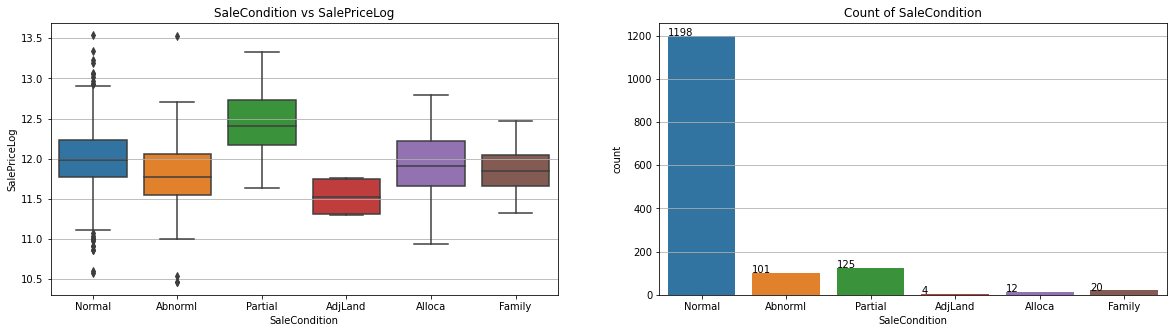

In [23]:
#boxplot visualisation of SaleCondition

categorical_feature='SaleCondition'

fig,ax = plt.subplots(1,2,figsize=(20,5))
a = sns.boxplot(x=train[categorical_feature],y=train['SalePriceLog'],ax=ax[0])
a.grid(axis='y')
a.set_title('{:s} vs SalePriceLog'.format(categorical_feature))
b = sns.countplot(x=train[categorical_feature],ax=ax[1])
b.grid(axis='y')
b.set_title('Count of {:s}'.format(categorical_feature))
for p in b.patches:
    b.annotate('{:d}'.format(p.get_height()), (p.get_x(), p.get_height()))

__Comment:__ Outliers concentrated in certain categories, and certain values have small sample size. Otherwise the variable appears to influence SalePrice.

#### 2.4 Feature Engineering and additional EDA insights

__Hypothesis:__ As the collected data coincided with the Global Financial Crisis, it was hypothesised that the year and month a property was transacted could significantly influence the SalePrice.<br>

A new feature YrMoSold is created to explore this.

In [24]:
#Feature-engineer YrMoSold variable

train['YrMoSold']=((train['YrSold']*12)-(2006*12))+train['MoSold']

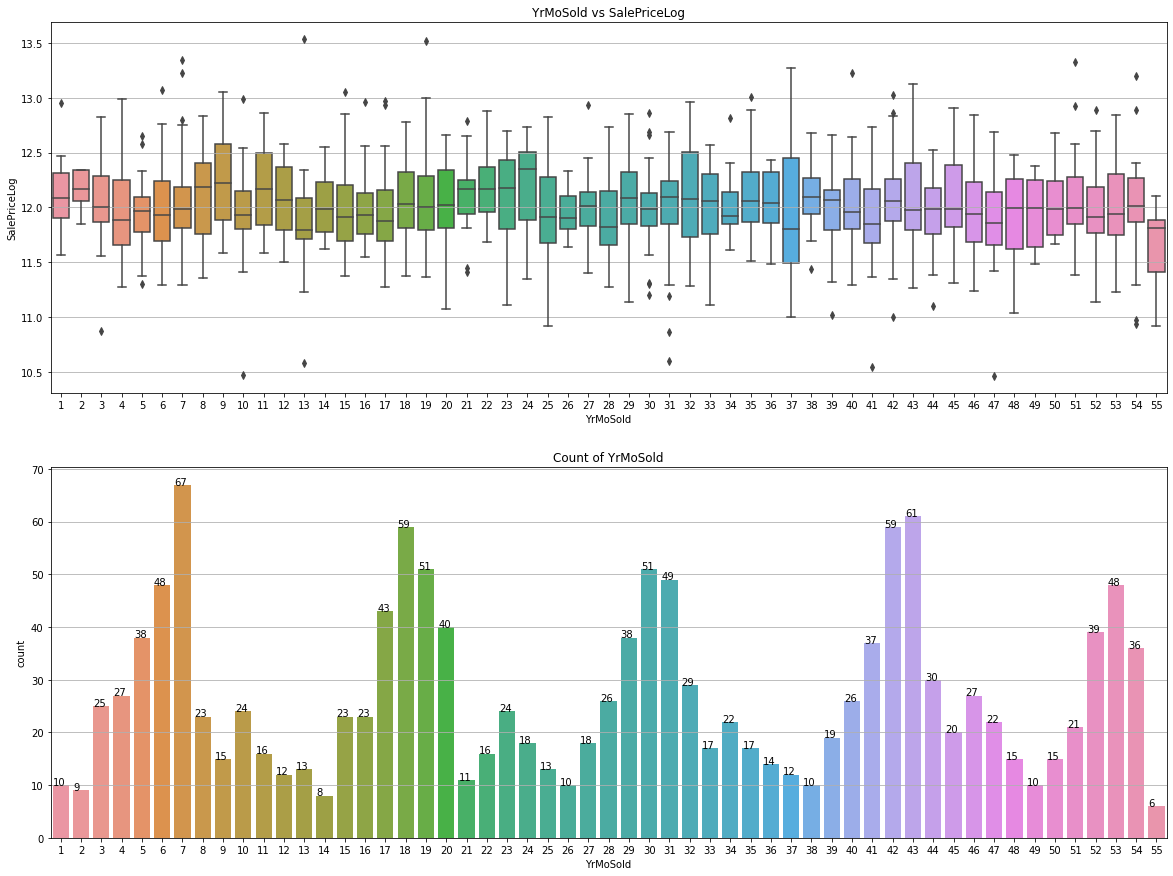

In [25]:
#boxplot visualisation of SaleCondition

categorical_feature='YrMoSold'

fig,ax = plt.subplots(2,1,figsize=(20,15))
a = sns.boxplot(x=train[categorical_feature],y=train['SalePriceLog'],ax=ax[0])
a.grid(axis='y')
a.set_title('{:s} vs SalePriceLog'.format(categorical_feature))
b = sns.countplot(x=train[categorical_feature],ax=ax[1])
b.grid(axis='y')
b.set_title('Count of {:s}'.format(categorical_feature))
for p in b.patches:
    b.annotate('{:d}'.format(p.get_height()), (p.get_x(), p.get_height()))

**Observation:**<br>

The distribution of SalePrice by YrMoSold is not as disparate as first thought.<br>
Upon further investigation, Ames, Ohio is a small town with lower priced property (relative to e.g. New York City) and therefore perhaps its location and stature shielded it from significant impact due to the GFC.<br>

There does however appear to be seasonal trends with transaction volumes, although this leaves some periods to have smaller sample sizes.<br>

YrMoSold will be transformed using OneHotEncoder to better reflect its trends, and fed into a predictive model to see if it improves performance.

**Hypothesis:** Price PSF is a commonly employed metric to show the affordability of properties.<br>
To this point, new features TotalArea and PricePSF will be created, and a model to predict PricePSF to be built.


In [26]:
#Feature-engineering of TotalArea and PricePSF

train['TotalArea'] = train['TotalBsmtSF'] + train['GrLivArea']+train['EntArea']
train['PricePSF']=train['SalePrice']/train['TotalArea']

Distribution of TotalArea


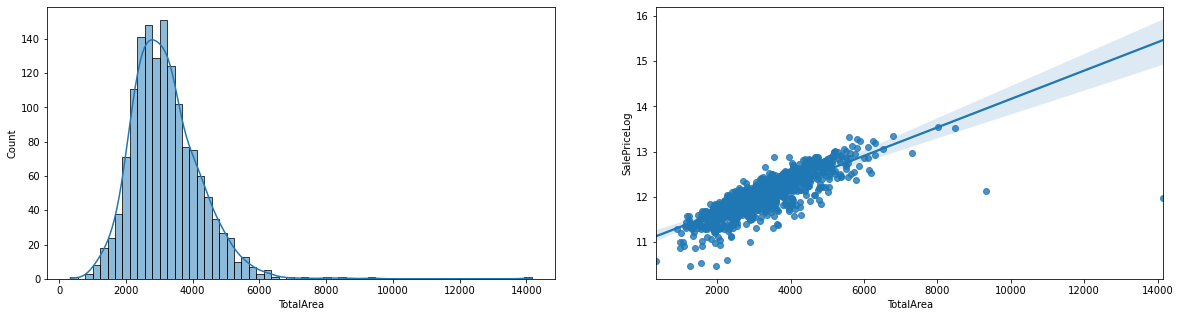

In [27]:
#visualisation of TotalArea

fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.histplot(train['TotalArea'],kde=True,ax=ax[0])
sns.regplot(x=train['TotalArea'],y=train['SalePriceLog'],ax=ax[1])
print('Distribution of TotalArea')

Shapiro Statistic = 0.982, p-value = 0.00000


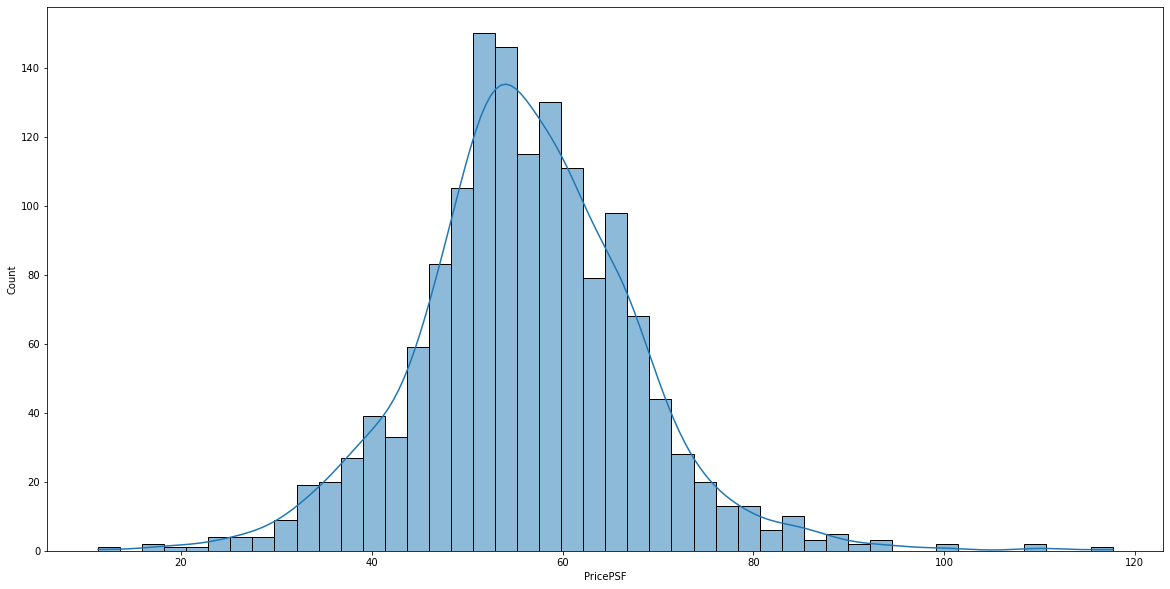

In [28]:
#distribution of PricePSF

plt.figure(figsize=(20, 10))
sns.histplot(x=train['PricePSF'],kde=True)

from scipy.stats import shapiro

stat, p = shapiro(train['PricePSF'])
print('Shapiro Statistic = %.3f, p-value = %.5f' % (stat,p))

__Comment:__ Raw values of PricePSF show a reasonably normal distribution, and will be used as a target in predictive modelling.

Distribution of OverallCond


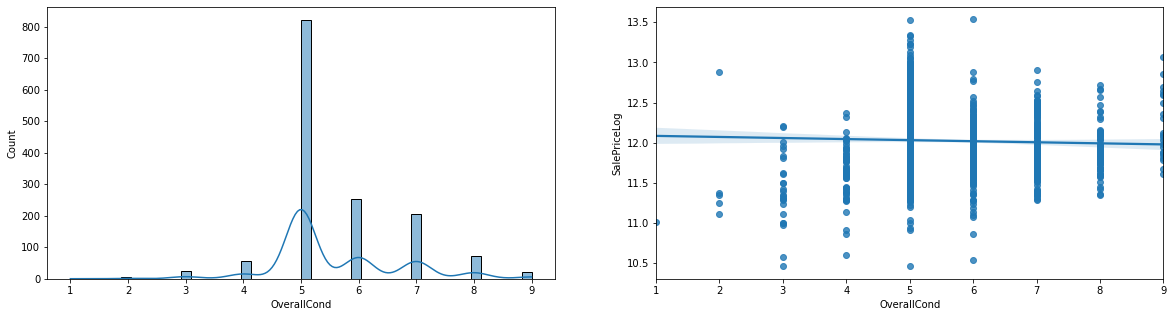

In [29]:
#visualisation of OverallCond

fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.histplot(train['OverallCond'],kde=True,ax=ax[0])
sns.regplot(x=train['OverallCond'],y=train['SalePriceLog'],ax=ax[1])
print('Distribution of OverallCond')

__Comment:__ OverallCond is similar in nature to OverallQual which was shown to be an important feature, and is included on that premise.

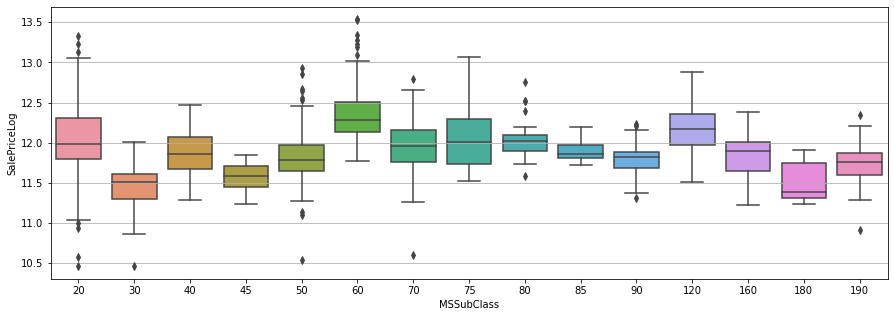

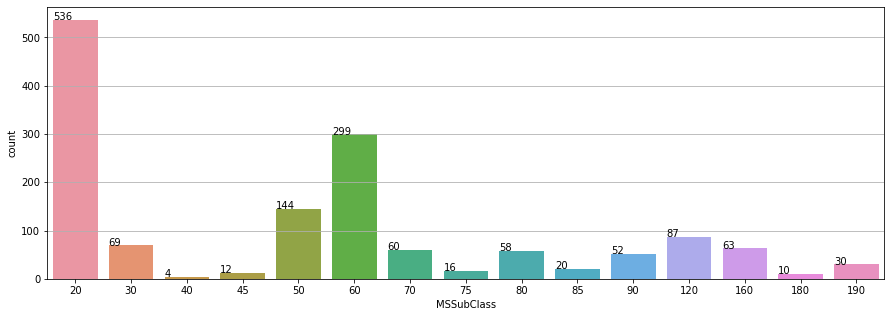

In [30]:
#boxplot visualisation of MSSubClass

plt.figure(figsize=(15, 5))
plt.grid()
sns.boxplot(x=train['MSSubClass'],y=train['SalePriceLog'])
plt.show()

plt.figure(figsize=(15, 5))
plt.grid()
ax=sns.countplot(x=train['MSSubClass'])

for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x(), p.get_height()))
        
plt.show()

__Comment:__ Although MSSubClass is in numerical formatting, it is categorical in nature.<br>
Feature will be transformed to reflect this.

__Outlier Treatment:__ EDA shows a significant number of 'outliers' in the dataset when referring to SalePrice.<br>
In particular, outliers appear more prevalent to be to the upside.<br>

The thought is that these are a fair reflection of actual transactions, <br>
and likely there are justifiable reasons as to why they transacted at higher prices that are not revealed by the data at hand.<br>

Also, it can be expected that the holdout test data would also contain similar outliers.<br>

Additionally, this solution will be applying Random Forest and XGBoost regression techniques, which minimise the affects of overfitting through the inclusion of outliers.<br>

For this reason, outliers will not be removed from the population.<br>

Eventually, the features will be scaled using PowerTransformer, which will transform the features to be more normally-distributed.

In [173]:
#finalised list of features to be included in predictive model

variables = ['SalePriceLog','PricePSF','Neighborhood','MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','ExterQual','ExterCond','GrLivArea','FullBath','BedroomAbvGr','GarageCars','MSZoning','HouseStyle','SaleCondition','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YrMoSold','EntArea','KitchenQual','LandContour']

variables1 = ['Neighborhood','MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','ExterQual','ExterCond','GrLivArea','FullBath','BedroomAbvGr','GarageCars','MSZoning','HouseStyle','SaleCondition','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YrMoSold','EntArea','KitchenQual','LandContour']

## 3. Predictive Modelling

3 predictive models will be built:<br>

- Predicting SalePriceLog using Random Forest Regressor
- Predicting SalePriceLog using XGBoost
- Predicting PricePSF using XGBoost

#### 3.1 Preprocessing

In [222]:
#creating dataframe consisting of utilised variables

train_modeldata = train[variables]

In [223]:
#creating dataframe to record model results

model_summary = pd.DataFrame(columns=['Median','Mean','StandardDeviation','MeanAbsoluteError','RootMeanSquaredError','RootMeanSquaredLogError','R2Score'])

In [224]:
#convert ExterQual, ExterCond, and KitchenQual from categorical to numerical variables

train_modeldata['ExterQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4,'Ex': 5},inplace=True)
train_modeldata['ExterCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4,'Ex': 5},inplace=True)
train_modeldata['KitchenQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4,'Ex': 5},inplace=True)

C:\Users\365honeymoon\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [225]:
#check for null values

train_modeldata.isnull().sum()

SalePriceLog     0
PricePSF         0
Neighborhood     0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
ExterQual        0
ExterCond        0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
GarageCars       0
MSZoning         0
HouseStyle       0
SaleCondition    0
TotalBsmtSF      0
1stFlrSF         0
TotRmsAbvGrd     0
YrMoSold         0
EntArea          0
KitchenQual      0
LandContour      0
dtype: int64

In [226]:
#check for categorical values

train_modeldata.dtypes

SalePriceLog     float64
PricePSF         float64
Neighborhood      object
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
ExterQual          int64
ExterCond          int64
GrLivArea          int64
FullBath           int64
BedroomAbvGr       int64
GarageCars         int64
MSZoning          object
HouseStyle        object
SaleCondition     object
TotalBsmtSF        int64
1stFlrSF           int64
TotRmsAbvGrd       int64
YrMoSold           int64
EntArea            int64
KitchenQual        int64
LandContour       object
dtype: object

In [227]:
#conversion of categorical values using OneHotEncoder
#as explained in EDA above, MSSubClass and YrMoSold will also be transformed using OneHotEncoder

categoricals = ['Neighborhood','MSZoning','HouseStyle','SaleCondition','LandContour','MSSubClass','YrMoSold']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype=np.int64)
OH_encoder.fit(train_modeldata[categoricals])
column_name = OH_encoder.get_feature_names(categoricals)
OH_modeldata = pd.DataFrame(OH_encoder.transform(train_modeldata[categoricals]),columns=column_name)

OH_modeldata.index = train_modeldata.index

numericals_modeldata = train_modeldata.drop(categoricals, axis=1)

train_modeldata = pd.concat([numericals_modeldata, OH_modeldata], axis=1)

In [228]:
#split features and targets for predictive model

features = train_modeldata.drop(['SalePriceLog','PricePSF'],axis=1).columns

X=train_modeldata[features]
y_SalePriceLog=train_modeldata['SalePriceLog']
y_PricePSF=train_modeldata['PricePSF']
TotalArea=train['TotalArea']


In [230]:
#scaling/transforming of features

transformer = PowerTransformer(method='yeo-johnson')
X_transformed = transformer.fit_transform(X)

cols = X.columns

X = pd.DataFrame(X_transformed, columns=[cols])

C:\Users\365honeymoon\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [231]:
#splitting test and training data (for SalePriceLog target)

X_train, X_test, y_train, y_test = train_test_split(X, y_SalePriceLog, test_size=0.25, random_state=0)

#### 3.2 Predicting SalePriceLog using Random Forest Regressor

In [239]:
#predictive model using RandomForestRegressor

predict_model_rfr = RandomForestRegressor() 
predict_model_rfr.fit(X_train,y_train)
price_prediction_rfr=predict_model_rfr.predict(X_test)

In [243]:
#model validation (Random Forest raw - converted back to SalePrice)

price_prediction_rfr = np.exp(price_prediction_rfr)
y_test_rfr = np.exp(y_test)
residue_rfr=np.subtract(y_test_rfr,price_prediction_rfr)

print('Median of Residuals: %.3f' % np.median(residue_rfr))
print('Mean of Residuals: %.3f' % np.mean(residue_rfr))
print('Standard Deviation of Residuals: %.3f' % np.std(residue_rfr))
print('Mean Absolute Error: %0.5f' % mean_absolute_error(price_prediction_rfr,y_test_rfr))
print('Root Mean Squared Error: %0.5f' % mean_squared_error(price_prediction_rfr,y_test_rfr,squared=False))
print('Root Mean Squared Log Error: %0.5f' % np.sqrt(mean_squared_log_error(price_prediction_rfr,y_test_rfr)))
print ('R2 Score: %0.5f' % r2_score(price_prediction_rfr,y_test_rfr))

Median of Residuals: 486.534
Mean of Residuals: 1058.256
Standard Deviation of Residuals: 30071.084
Mean Absolute Error: 17696.49423
Root Mean Squared Error: 30089.69888
Root Mean Squared Log Error: 0.13488
R2 Score: 0.82933


In [242]:
#add to summary dataframe

## change price_prediction & index_name

index_name = 'RandomForestRaw'
price_prediction = price_prediction_rfr
y_test_result = np.exp(y_test)
residue=np.subtract(y_test_result,price_prediction)

median = np.median(residue)
mean = np.mean(residue)
standard_deviation = np.std(residue)
mae = mean_absolute_error(price_prediction,y_test_result)
rootmsqe = mean_squared_error(price_prediction,y_test_result,squared=False)
rootmsqloge = np.sqrt(mean_squared_log_error(price_prediction,y_test_result))
r2 = r2_score(price_prediction,y_test_result)

result_summary = pd.DataFrame(np.array([median,mean,standard_deviation,mae,rootmsqe,rootmsqloge,r2]).reshape(1,7),
                                       columns=model_summary.columns,
                                       index=[index_name])

model_summary = model_summary.append(result_summary)

model_summary

,Median,Mean,StandardDeviation,MeanAbsoluteError,RootMeanSquaredError,RootMeanSquaredLogError,R2Score
RandomForestRaw,486.533596,1058.255998,30071.083669,17696.494229,30089.698881,0.134884,0.829328


__Comment:__ R-squared score, which is a measure of goodness-of-fit, is 83% which is promising.<br>
Further improvements can be expected upon finetuning hyperparameters.

C:\Users\365honeymoon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


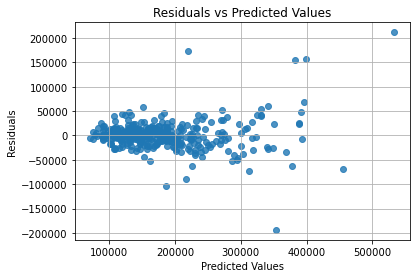

C:\Users\365honeymoon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


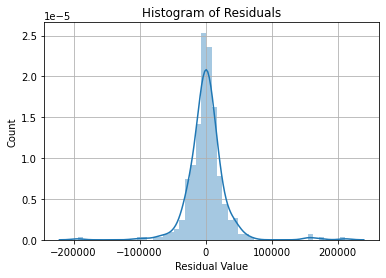

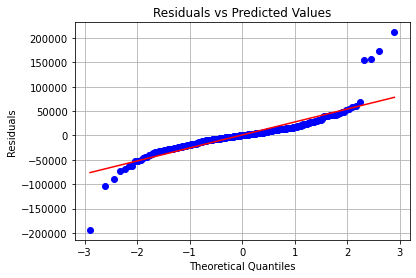

In [244]:
# visualisation of Random Forest model

n = len(X_train)
r2 = r2_score(price_prediction_rfr,y_test_rfr)
p = len(features)+1

def resid_plot(y_test_rfr,price_prediction_rfr):
    resids = np.subtract(y_test_rfr,price_prediction_rfr)
    sns.regplot(price_prediction_rfr,resids,fit_reg=False)
    plt.grid()
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    
    
def hist_resids(y_test_rfr,price_prediction_rfr):
    resids = np.subtract(y_test_rfr,price_prediction_rfr)
    sns.distplot(resids)
    plt.grid()
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Count')
    plt.show()

def resid_qq(y_test_rfr,price_prediction_rfr):
    resids = np.subtract(y_test_rfr,price_prediction_rfr)
    stats.probplot(resids,plot=plt)
    plt.grid()
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Residuals')
    plt.show()    

resid_plot(y_test_rfr,price_prediction_rfr)
hist_resids(y_test_rfr,price_prediction_rfr)
resid_qq(y_test_rfr,price_prediction_rfr)

__Comment:__ Residuals appear normally distributed between quantile values of -2 and 2 on the Q-Q plot, where the model predicts to within +/-$50k of the actual sale price.<br>
Outside of this region there are a handful of outliers which are significantly incorrectly predicted.<br>
Hyperparameter refinement will be applied to see if these values can be minimised. 

In [246]:
#optimising hyperparameters

# parameters = {'max_features': ['auto'],
#               'max_depth': [None],
#               'min_samples_split':[2,3,4],
#               'min_samples_leaf' :[1,2,3],
#              'n_estimators': [500,1000]}


# rfr1 = RandomForestRegressor()

# rfr_grid = GridSearchCV(rfr1,
#                         parameters,
#                         cv = 5,
#                         n_jobs = 5,
#                         verbose=3)

# rfr_grid.fit(X,y_SalePriceLog)

# print(rfr_grid.best_score_)
# print(rfr_grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0.8676315225518424
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [247]:
#repeat RandomForestRegressor modelling with refined hyperparameters

predict_model_rfr1 = RandomForestRegressor(min_samples_leaf=1,min_samples_split=2, n_estimators=500) 
predict_model_rfr1.fit(X_train,y_train)
price_prediction_rfr1=predict_model_rfr1.predict(X_test)

In [248]:
#model validation (Random Forest refined - converted back to SalePrice)

price_prediction_rfr1 = np.exp(price_prediction_rfr1)
y_test_rfr1 = np.exp(y_test)
residue_rfr1=np.subtract(y_test_rfr1,price_prediction_rfr1)

print('Median of Residuals: %.3f' % np.median(residue_rfr1))
print('Mean of Residuals: %.3f' % np.mean(residue_rfr1))
print('Standard Deviation of Residuals: %.3f' % np.std(residue_rfr1))
print('Mean Absolute Error: %0.5f' % mean_absolute_error(price_prediction_rfr1,y_test_rfr1))
print('Root Mean Squared Error: %0.5f' % mean_squared_error(price_prediction_rfr1,y_test_rfr1,squared=False))
print('Root Mean Squared Log Error: %0.5f' % np.sqrt(mean_squared_log_error(price_prediction_rfr1,y_test_rfr1)))
print ('R2 Score: %0.5f' % r2_score(price_prediction_rfr1,y_test_rfr1))

Median of Residuals: 546.062
Mean of Residuals: 1211.109
Standard Deviation of Residuals: 29266.733
Mean Absolute Error: 17672.17792
Root Mean Squared Error: 29291.78158
Root Mean Squared Log Error: 0.13274
R2 Score: 0.83800


In [249]:
#add to summary dataframe

## change price_prediction & index_name

index_name = 'RandomForestRefined'
price_prediction = price_prediction_rfr1
y_test_result = np.exp(y_test)
residue=np.subtract(y_test_result,price_prediction)

median = np.median(residue)
mean = np.mean(residue)
standard_deviation = np.std(residue)
mae = mean_absolute_error(price_prediction,y_test_result)
rootmsqe = mean_squared_error(price_prediction,y_test_result,squared=False)
rootmsqloge = np.sqrt(mean_squared_log_error(price_prediction,y_test_result))
r2 = r2_score(price_prediction,y_test_result)

result_summary = pd.DataFrame(np.array([median,mean,standard_deviation,mae,rootmsqe,rootmsqloge,r2]).reshape(1,7),
                                       columns=model_summary.columns,
                                       index=[index_name])

model_summary = model_summary.append(result_summary)

model_summary

,Median,Mean,StandardDeviation,MeanAbsoluteError,RootMeanSquaredError,RootMeanSquaredLogError,R2Score
RandomForestRaw,486.533596,1058.255998,30071.083669,17696.494229,30089.698881,0.134884,0.829328
RandomForestRefined,546.062103,1211.109438,29266.733365,17672.177916,29291.781577,0.132737,0.838002


__Comment:__ Marginal improvements seen in model validation depending on the metric, with R-squared value up to 84%.

In [403]:
#cross-validation of model

kfold = ms.KFold(n_splits=5, shuffle=True)
scores = ms.cross_validate
scoring = ['r2']
model = predict_model_rfr1 

scores = ms.cross_validate(model, X, y_SalePriceLog, scoring=scoring,
                        cv=kfold, return_train_score=True,return_estimator=True)

scores

{'fit_time': array([22.31715655, 19.18072009, 21.36001754, 21.99025726, 20.9140296 ]),
 'score_time': array([0.24877214, 0.18310905, 0.21906543, 0.21502566, 0.18006349]),
 'estimator': [RandomForestRegressor(n_estimators=500),
  RandomForestRegressor(n_estimators=500),
  RandomForestRegressor(n_estimators=500),
  RandomForestRegressor(n_estimators=500),
  RandomForestRegressor(n_estimators=500)],
 'test_r2': array([0.86002797, 0.86769257, 0.84429384, 0.84769686, 0.89815699]),
 'train_r2': array([0.98188806, 0.98242787, 0.98225497, 0.98093787, 0.98039951])}

C:\Users\365honeymoon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


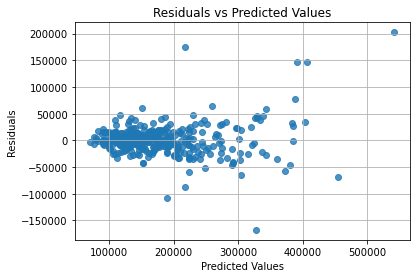

C:\Users\365honeymoon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


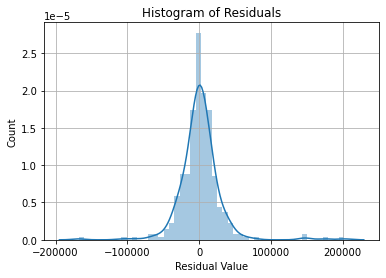

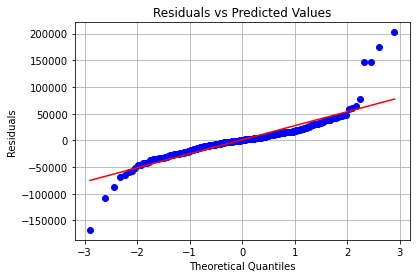

In [410]:
# visualisation of Random Forest model (w/ refined hyperparameters)

n = len(X_train)
r2 = r2_score(price_prediction_rfr1,y_test_rfr1)
p = len(features)+1

def resid_plot(y_test_rfr1,price_prediction_rfr1):
    resids = np.subtract(y_test_rfr1,price_prediction_rfr1)
    sns.regplot(price_prediction_rfr1,resids,fit_reg=False)
    plt.grid()
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    
    
def hist_resids(y_test_rfr1,price_prediction_rfr1):
    resids = np.subtract(y_test_rfr1,price_prediction_rfr1)
    sns.distplot(resids)
    plt.grid()
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Count')
    plt.show()

def resid_qq(y_test_rfr1,price_prediction_rfr1):
    resids = np.subtract(y_test_rfr1,price_prediction_rfr1)
    stats.probplot(resids,plot=plt)
    plt.grid()
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Residuals')
    plt.show()    

resid_plot(y_test_rfr1,price_prediction_rfr1)
hist_resids(y_test_rfr1,price_prediction_rfr1)
resid_qq(y_test_rfr1,price_prediction_rfr1)

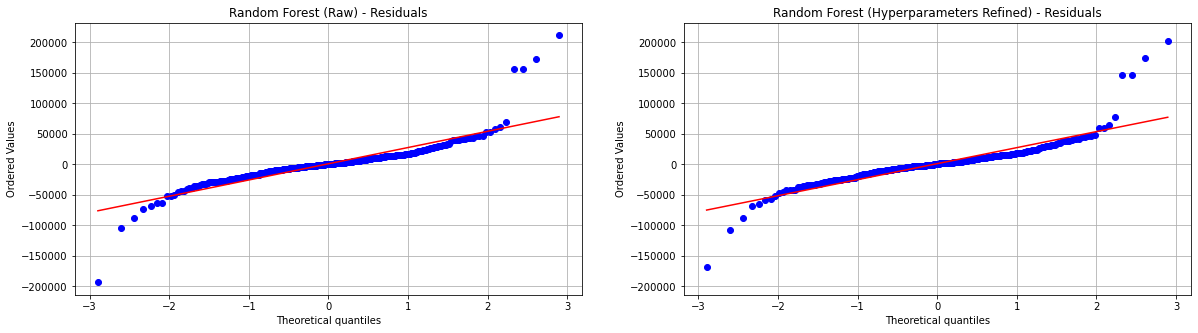

In [409]:
#comparing original raw model vs revised model with refined hyperparameters

fig,axs = plt.subplots(1,2,figsize=(20,5))

ax1 = plt.subplot(121)
res=stats.probplot(np.subtract(y_test_rfr,price_prediction_rfr),plot=plt)
plt.grid()
plt.title('Random Forest (Raw) - Residuals')

ax2 = plt.subplot(122,sharey=ax1)
res=stats.probplot(np.subtract(y_test_rfr,price_prediction_rfr1),plot=plt)
plt.grid()
plt.title('Random Forest (Hyperparameters Refined) - Residuals')

plt.show()

__Comment:__ There are marginal improvements observed after refining the hyperparameters.<br>
The largest positive and negative residuals have slightly decreased, but the outliers outside of quantiles -2 and 2 remain significant.<br>

#### 3.3 Predicting SalePriceLog using XGBoost

In [252]:
#predictive model using XGBoost

predict_model_xgb = XGBRegressor() 
predict_model_xgb.fit(X_train,y_train)
price_prediction_xgb=predict_model_xgb.predict(X_test)

In [255]:
#model validation (XGBoost raw - converted back to SalePrice)

price_prediction_xgb = np.exp(price_prediction_xgb)
y_test_xgb = np.exp(y_test)
residue_xgb=np.subtract(y_test_xgb,price_prediction_xgb)

print('Median of Residuals: %.3f' % np.median(residue_xgb))
print('Mean of Residuals: %.3f' % np.mean(residue_xgb))
print('Standard Deviation of Residuals: %.3f' % np.std(residue_xgb))
print('Mean Absolute Error: %0.5f' % mean_absolute_error(price_prediction_xgb,y_test_xgb))
print('Root Mean Squared Error: %0.5f' % mean_squared_error(price_prediction_xgb,y_test_xgb,squared=False))
print('Root Mean Squared Log Error: %0.5f' % np.sqrt(mean_squared_log_error(price_prediction_xgb,y_test_xgb)))
print ('R2 Score: %0.5f' % r2_score(price_prediction_xgb,y_test_xgb))

Median of Residuals: 880.969
Mean of Residuals: -393.717
Standard Deviation of Residuals: 26921.201
Mean Absolute Error: 17392.36107
Root Mean Squared Error: 26924.07964
Root Mean Squared Log Error: 0.13265
R2 Score: 0.88872


In [256]:
#add to summary dataframe

## change price_prediction & index_name

index_name = 'XGBoostRaw'
price_prediction = price_prediction_xgb
y_test_result = np.exp(y_test)
residue=np.subtract(y_test_result,price_prediction)

median = np.median(residue)
mean = np.mean(residue)
standard_deviation = np.std(residue)
mae = mean_absolute_error(price_prediction,y_test_result)
rootmsqe = mean_squared_error(price_prediction,y_test_result,squared=False)
rootmsqloge = np.sqrt(mean_squared_log_error(price_prediction,y_test_result))
r2 = r2_score(price_prediction,y_test_result)

result_summary = pd.DataFrame(np.array([median,mean,standard_deviation,mae,rootmsqe,rootmsqloge,r2]).reshape(1,7),
                                       columns=model_summary.columns,
                                       index=[index_name])

model_summary = model_summary.append(result_summary)

model_summary

,Median,Mean,StandardDeviation,MeanAbsoluteError,RootMeanSquaredError,RootMeanSquaredLogError,R2Score
RandomForestRaw,486.533596,1058.255998,30071.083669,17696.494229,30089.698881,0.134884,0.829328
RandomForestRefined,546.062103,1211.109438,29266.733365,17672.177916,29291.781577,0.132737,0.838002
XGBoostRaw,880.968750,-393.717145,26921.200773,17392.361066,26924.079636,0.132650,0.888716


__Comment:__ Across almost all metrics, XGBoost is showing superior predictive performance compared to the Random Forest model.

C:\Users\365honeymoon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


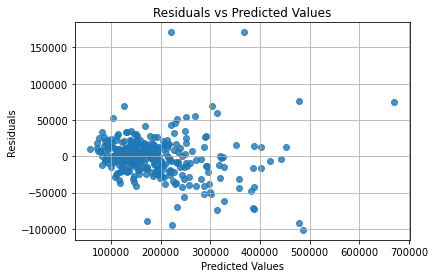

C:\Users\365honeymoon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


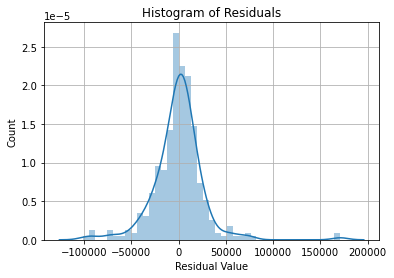

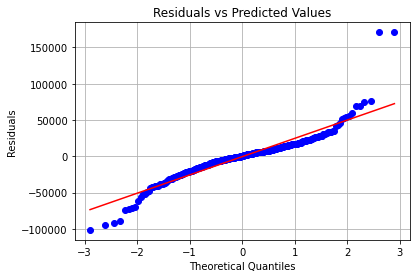

In [411]:
# visualisation of XGBoost model 

n = len(X_train)
r2 = r2_score(price_prediction_xgb,y_test_xgb)
p = len(features)+1

def resid_plot(y_test_xgb,price_prediction_xgb):
    resids = np.subtract(y_test_xgb,price_prediction_xgb)
    sns.regplot(price_prediction_xgb,resids,fit_reg=False)
    plt.grid()
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    
    
def hist_resids(y_test_xgb,price_prediction_xgb):
    resids = np.subtract(y_test_xgb,price_prediction_xgb)
    sns.distplot(resids)
    plt.grid()
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Count')
    plt.show()

def resid_qq(y_test_xgb,price_prediction_xgb):
    resids = np.subtract(y_test_xgb,price_prediction_xgb)
    stats.probplot(resids,plot=plt)
    plt.grid()
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Residuals')
    plt.show()    

resid_plot(y_test_xgb,price_prediction_xgb)
hist_resids(y_test_xgb,price_prediction_xgb)
resid_qq(y_test_xgb,price_prediction_xgb)

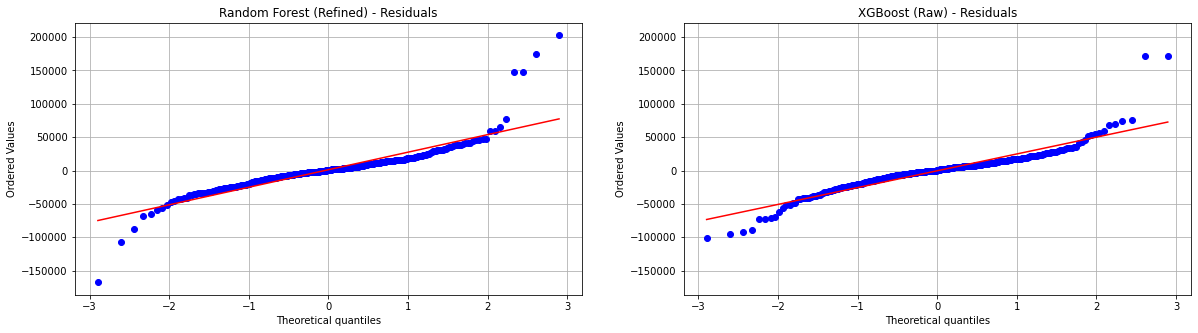

In [412]:
#comparing Random Forest (refined) vs XGBoost

fig,axs = plt.subplots(1,2,figsize=(20,5))

ax1 = plt.subplot(121)
res=stats.probplot(np.subtract(y_test_rfr,price_prediction_rfr1),plot=plt)
plt.grid()
plt.title('Random Forest (Refined) - Residuals')

ax2 = plt.subplot(122,sharey=ax1)
res=stats.probplot(np.subtract(y_test_xgb,price_prediction_xgb),plot=plt)
plt.grid()
plt.title('XGBoost (Raw) - Residuals')

plt.show()

__Comment:__ XGBoost model is predicting to within a tighter range than the Random Forest model.<br>
However it should be noted that both models performance between the -2 and 2 quantiles are similar,<br>
and Random Forest appears to perform better at a small range between quantile values -2.4 and -2.0.

In [259]:
# #optimising hyperparameters

# parameters = {'booster':['gbtree','dart'],
#             'objective':['reg:squarederror'],
#               'learning_rate': [0.05, 0.06, 0.07, 0.08], 
#               'max_depth': [2, 3, 4, 5],
#              'n_estimators': [500, 1000]}


# xgb1 = XGBRegressor()

# xgb_grid = GridSearchCV(xgb1,
#                         parameters,
#                         cv = 5,
#                         n_jobs = 5,
#                         verbose=3)

# xgb_grid.fit(X,y_SalePriceLog)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
0.8954372885624263
{'booster': 'gbtree', 'learning_rate': 0.06, 'max_depth': 2, 'n_estimators': 1000, 'objective': 'reg:squarederror'}


In [260]:
#predictive model using XGBoost with refined hyperparameters

# prior GridSearchCV result
# predict_model_xgb1 = XGBRegressor(booster='dart', learning_rate=0.06, max_depth=3, n_estimators=1000) 

predict_model_xgb1 = XGBRegressor(booster='gbtree', learning_rate=0.06, max_depth=2, n_estimators=1000) 
predict_model_xgb1.fit(X_train,y_train)
price_prediction_xgb1=predict_model_xgb1.predict(X_test)

In [262]:
#model validation (XGBoost refined - converted back to SalePrice)

price_prediction_xgb1 = np.exp(price_prediction_xgb1)
y_test_xgb1 = np.exp(y_test)
residue_xgb1=np.subtract(y_test_xgb1,price_prediction_xgb1)

print('Median of Residuals: %.3f' % np.median(residue_xgb1))
print('Mean of Residuals: %.3f' % np.mean(residue_xgb1))
print('Standard Deviation of Residuals: %.3f' % np.std(residue_xgb1))
print('Mean Absolute Error: %0.5f' % mean_absolute_error(price_prediction_xgb1,y_test_xgb1))
print('Root Mean Squared Error: %0.5f' % mean_squared_error(price_prediction_xgb1,y_test_xgb1,squared=False))
print('Root Mean Squared Log Error: %0.5f' % np.sqrt(mean_squared_log_error(price_prediction_xgb1,y_test_xgb1)))
print ('R2 Score: %0.5f' % r2_score(price_prediction_xgb1,y_test_xgb1))

Median of Residuals: 1261.109
Mean of Residuals: -143.587
Standard Deviation of Residuals: 26052.280
Mean Absolute Error: 16886.10377
Root Mean Squared Error: 26052.67583
Root Mean Squared Log Error: 0.12999
R2 Score: 0.88967


In [263]:
#add to summary dataframe

## change price_prediction & index_name

index_name = 'XGBoostRefined'
price_prediction = price_prediction_xgb1
y_test_result = np.exp(y_test)
residue=np.subtract(y_test_result,price_prediction)

median = np.median(residue)
mean = np.mean(residue)
standard_deviation = np.std(residue)
mae = mean_absolute_error(price_prediction,y_test_result)
rootmsqe = mean_squared_error(price_prediction,y_test_result,squared=False)
rootmsqloge = np.sqrt(mean_squared_log_error(price_prediction,y_test_result))
r2 = r2_score(price_prediction,y_test_result)

result_summary = pd.DataFrame(np.array([median,mean,standard_deviation,mae,rootmsqe,rootmsqloge,r2]).reshape(1,7),
                                       columns=model_summary.columns,
                                       index=[index_name])

model_summary = model_summary.append(result_summary)

model_summary

,Median,Mean,StandardDeviation,MeanAbsoluteError,RootMeanSquaredError,RootMeanSquaredLogError,R2Score
RandomForestRaw,486.533596,1058.255998,30071.083669,17696.494229,30089.698881,0.134884,0.829328
RandomForestRefined,546.062103,1211.109438,29266.733365,17672.177916,29291.781577,0.132737,0.838002
XGBoostRaw,880.968750,-393.717145,26921.200773,17392.361066,26924.079636,0.132650,0.888716
XGBoostRefined,1261.109375,-143.587457,26052.280142,16886.103767,26052.675831,0.129988,0.889671


__Comment:__ Marginal improvements in results after refining hyperparameters.

In [414]:
#cross-validation of model

kfold = ms.KFold(n_splits=5, shuffle=True)
scores = ms.cross_validate
scoring = ['r2']
model = predict_model_xgb 

scores = ms.cross_validate(model, X, y_SalePriceLog, scoring=scoring,
                        cv=kfold, return_train_score=True,return_estimator=True)

scores

{'fit_time': array([1.23233819, 0.96837616, 0.77014232, 0.6682055 , 0.56762147]),
 'score_time': array([0.0117445 , 0.00797939, 0.00797629, 0.00702286, 0.008044  ]),
 'estimator': [XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.300000012,
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
               validate_parameters=1, verbosity=None),
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0

C:\Users\365honeymoon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


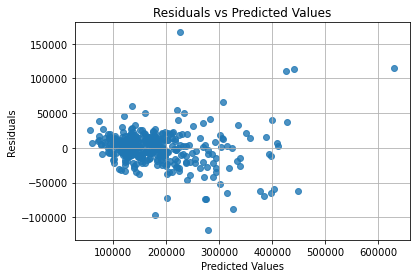

C:\Users\365honeymoon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


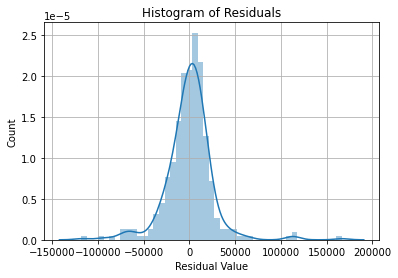

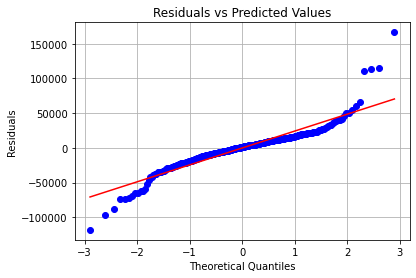

In [264]:
# visualisation of XGBoost model (hyperparameter-refined version)

n = len(X_train)
r2 = r2_score(price_prediction_xgb1,y_test_xgb1)
p = len(features)+1

def resid_plot(y_test_xgb1,price_prediction_xgb1):
    resids = np.subtract(y_test_xgb1,price_prediction_xgb1)
    sns.regplot(price_prediction_xgb1,resids,fit_reg=False)
    plt.grid()
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    
    
def hist_resids(y_test_xgb1,price_prediction_xgb1):
    resids = np.subtract(y_test_xgb1,price_prediction_xgb1)
    sns.distplot(resids)
    plt.grid()
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Count')
    plt.show()

def resid_qq(y_test_xgb1,price_prediction_xgb1):
    resids = np.subtract(y_test_xgb1,price_prediction_xgb1)
    stats.probplot(resids,plot=plt)
    plt.grid()
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Residuals')
    plt.show()    

resid_plot(y_test_xgb1,price_prediction_xgb1)
hist_resids(y_test_xgb1,price_prediction_xgb1)
resid_qq(y_test_xgb1,price_prediction_xgb1)

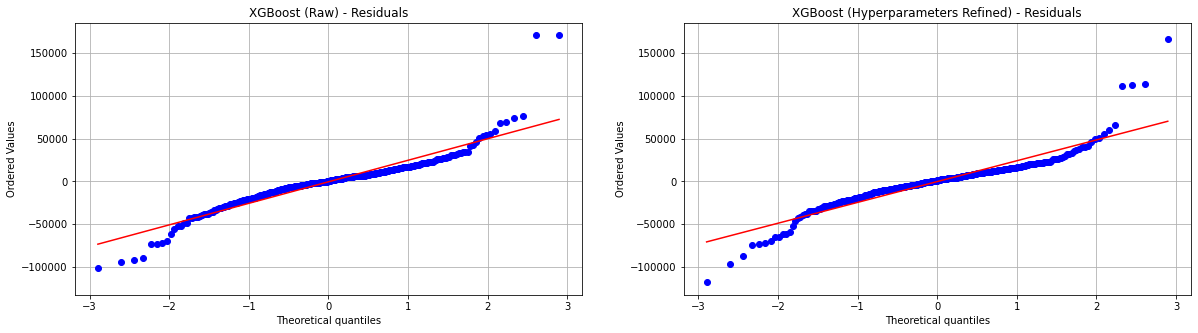

In [415]:
#comparing original raw model vs revised model with refined hyperparameters

fig,axs = plt.subplots(1,2,figsize=(20,5))

ax1 = plt.subplot(121)
res=stats.probplot(np.subtract(y_test_xgb,price_prediction_xgb),plot=plt)
plt.grid()
plt.title('XGBoost (Raw) - Residuals')

ax2 = plt.subplot(122,sharey=ax1)
res=stats.probplot(np.subtract(y_test_xgb,price_prediction_xgb1),plot=plt)
plt.grid()
plt.title('XGBoost (Hyperparameters Refined) - Residuals')

plt.show()

__Comment:__ Improvement in the refined model can be seen between quantile range 1.0-2.0, where residuals have been slightly minimised.<br>

However the residuals of outliers have increased, perhaps suggesting some traits of an overfitted model.<br>

Still, based on model validation metrics, this refined XGBoost model is still the best to-date.

#### 3.4 Predicting PricePSF using XGBoost

In [266]:
#splitting test and training data (for PricePSF predict)

TotalArea_train, TotalArea_test, y_train_psf, y_test_psf = train_test_split(TotalArea, y_PricePSF, test_size=0.25, random_state=0)

In [269]:
#predictive model using XGBoost

predict_model_xgb_psf = XGBRegressor() 
predict_model_xgb_psf.fit(X_train,y_train_psf)
price_prediction_xgb_psf=predict_model_xgb_psf.predict(X_test)

In [271]:
#model validation (XGBoost raw - PricePSF method)

price_prediction_xgb_pricepsf=price_prediction_xgb_psf*TotalArea_test
residue_xgb_psf=np.subtract(y_test_xgb,price_prediction_xgb_pricepsf)

print('Median of Residuals: %.3f' % np.median(residue_xgb_psf))
print('Mean of Residuals: %.3f' % np.mean(residue_xgb_psf))
print('Standard Deviation of Residuals: %.3f' % np.std(residue_xgb_psf))
print('Mean Absolute Error: %0.5f' % mean_absolute_error(price_prediction_xgb_pricepsf,y_test_xgb))
print('Root Mean Squared Error: %0.5f' % mean_squared_error(price_prediction_xgb_pricepsf,y_test_xgb,squared=False))
print('Root Mean Squared Log Error: %0.5f' % np.sqrt(mean_squared_log_error(price_prediction_xgb_pricepsf,y_test_xgb)))
print ('R2 Score: %0.5f' % r2_score(price_prediction_xgb_pricepsf,y_test_xgb))

Median of Residuals: -68.255
Mean of Residuals: -2754.190
Standard Deviation of Residuals: 28010.055
Mean Absolute Error: 17513.88367
Root Mean Squared Error: 28145.13764
Root Mean Squared Log Error: 0.13791
R2 Score: 0.89053


In [272]:
#add to summary dataframe

## change price_prediction & index_name

index_name = 'XGBoostRaw(PricePSF)'
price_prediction = price_prediction_xgb_pricepsf
y_test_result = np.exp(y_test)
residue=np.subtract(y_test_result,price_prediction)

median = np.median(residue)
mean = np.mean(residue)
standard_deviation = np.std(residue)
mae = mean_absolute_error(price_prediction,y_test_result)
rootmsqe = mean_squared_error(price_prediction,y_test_result,squared=False)
rootmsqloge = np.sqrt(mean_squared_log_error(price_prediction,y_test_result))
r2 = r2_score(price_prediction,y_test_result)

result_summary = pd.DataFrame(np.array([median,mean,standard_deviation,mae,rootmsqe,rootmsqloge,r2]).reshape(1,7),
                                       columns=model_summary.columns,
                                       index=[index_name])

model_summary = model_summary.append(result_summary)

model_summary

,Median,Mean,StandardDeviation,MeanAbsoluteError,RootMeanSquaredError,RootMeanSquaredLogError,R2Score
RandomForestRaw,486.533596,1058.255998,30071.083669,17696.494229,30089.698881,0.134884,0.829328
RandomForestRefined,546.062103,1211.109438,29266.733365,17672.177916,29291.781577,0.132737,0.838002
XGBoostRaw,880.968750,-393.717145,26921.200773,17392.361066,26924.079636,0.132650,0.888716
XGBoostRefined,1261.109375,-143.587457,26052.280142,16886.103767,26052.675831,0.129988,0.889671
XGBoostRaw(PricePSF),-68.254669,-2754.190497,28010.055467,17513.883667,28145.137636,0.137912,0.890532


__Comment:__ Interesting to note that the R-squared value is marginally better than the XGBoost model predicting SalePrice earlier,<br>
and that based on other metrics the results are promising.


C:\Users\365honeymoon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


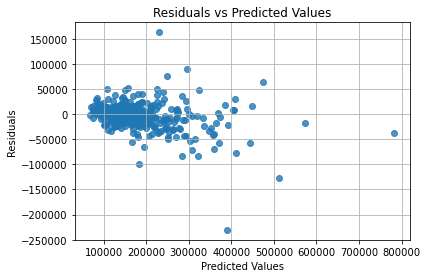

C:\Users\365honeymoon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


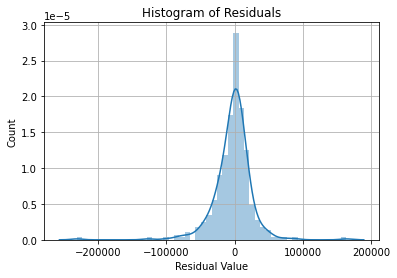

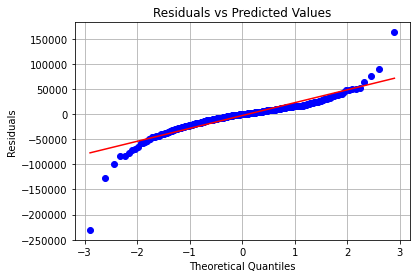

In [273]:
# visualisation of XGBoost model (PricePSF predict)

n = len(X_train)
r2 = r2_score(price_prediction_xgb_pricepsf,y_test_xgb)
p = len(features)+1

def resid_plot(y_test_xgb,price_prediction_xgb_pricepsf):
    resids = np.subtract(y_test_xgb,price_prediction_xgb_pricepsf)
    sns.regplot(price_prediction_xgb_pricepsf,resids,fit_reg=False)
    plt.grid()
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    
    
def hist_resids(y_test_xgb,price_prediction_xgb_pricepsf):
    resids = np.subtract(y_test_xgb,price_prediction_xgb_pricepsf)
    sns.distplot(resids)
    plt.grid()
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Count')
    plt.show()

def resid_qq(y_test_xgb,price_prediction_xgb_pricepsf):
    resids = np.subtract(y_test_xgb,price_prediction_xgb_pricepsf)
    stats.probplot(resids,plot=plt)
    plt.grid()
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Residuals')
    plt.show()    

resid_plot(y_test_xgb,price_prediction_xgb_pricepsf)
hist_resids(y_test_xgb,price_prediction_xgb_pricepsf)
resid_qq(y_test_xgb,price_prediction_xgb_pricepsf)

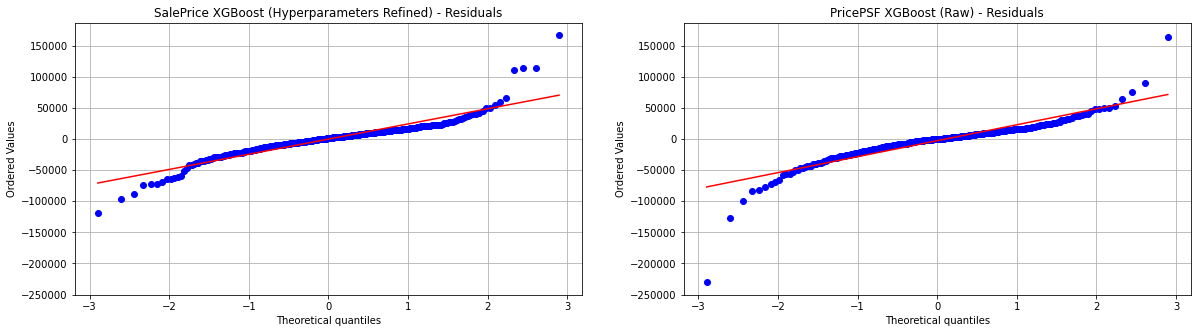

In [430]:
#comparing XGBoost SalePrice predict vs PricePSF predict

fig,axs = plt.subplots(1,2,figsize=(20,5))

ax1 = plt.subplot(121)
res=stats.probplot(np.subtract(y_test_xgb,price_prediction_xgb1),plot=plt)
plt.grid()
plt.title('SalePrice XGBoost (Hyperparameters Refined) - Residuals')

ax2 = plt.subplot(122,sharey=ax1)
res=stats.probplot(np.subtract(y_test_xgb,price_prediction_xgb_pricepsf),plot=plt)
plt.grid()
plt.title('PricePSF XGBoost (Raw) - Residuals')

plt.show()

__Comment:__ The PricePSF predictive model is comparable in its performance to the SalePrice model, and perhaps outperforms outside the -2 and 2 quantile, however is let down by its largest negative residual value (approx. $-240k)<br>

In [275]:
# #optimising hyperparameters

# parameters = {'booster':['gbtree','dart'],
#             'objective':['reg:squarederror'],
#               'learning_rate': [0.05, 0.06, 0.07, 0.08], 
#               'max_depth': [2, 3, 4, 5],
#              'n_estimators': [500, 1000]}


# xgb1 = XGBRegressor()

# xgb_grid = GridSearchCV(xgb1,
#                         parameters,
#                         cv = 5,
#                         n_jobs = 5,
#                         verbose=3)

# xgb_grid.fit(X,y_PricePSF)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
0.6371509707048251
{'booster': 'gbtree', 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 1000, 'objective': 'reg:squarederror'}


In [276]:
#predictive model using XGBoost (refined hyperparameters)

predict_model_xgb1_psf = XGBRegressor(booster='gbtree', learning_rate=0.05, max_depth=4, n_estimators=1000) 
predict_model_xgb1_psf.fit(X_train,y_train_psf)
price_prediction_xgb1_psf=predict_model_xgb1_psf.predict(X_test)

In [278]:
#model validation (XGBoost raw - PricePSF method)

price_prediction_xgb1_pricepsf=price_prediction_xgb1_psf*TotalArea_test
residue_xgb1_psf=np.subtract(y_test_xgb,price_prediction_xgb1_pricepsf)

print('Median of Residuals: %.3f' % np.median(residue_xgb1_psf))
print('Standard Deviation of Residuals: %.3f' % np.std(residue_xgb1_psf))
print('Mean Absolute Error: %0.5f' % mean_absolute_error(price_prediction_xgb1_pricepsf,y_test_xgb))
print('Root Mean Squared Error: %0.5f' % mean_squared_error(price_prediction_xgb1_pricepsf,y_test_xgb,squared=False))
print('Root Mean Squared Log Error: %0.5f' % np.sqrt(mean_squared_log_error(price_prediction_xgb1_pricepsf,y_test_xgb)))
print ('R2 Score: %0.5f' % r2_score(price_prediction_xgb1_pricepsf,y_test_xgb))

Median of Residuals: -140.639
Mean of Residuals: -1820.659
Standard Deviation of Residuals: 26909.632


Mean Absolute Error: 16942.63194
Root Mean Squared Error: 26971.15268
Root Mean Squared Log Error: 0.13411
R2 Score: 0.89119


In [279]:
#add to summary dataframe

## change price_prediction & index_name

index_name = 'XGBoostRefined(PricePSF)'
price_prediction = price_prediction_xgb1_pricepsf
y_test_result = np.exp(y_test)
residue=np.subtract(y_test_result,price_prediction)

median = np.median(residue)
mean = np.mean(residue)
standard_deviation = np.std(residue)
mae = mean_absolute_error(price_prediction,y_test_result)
rootmsqe = mean_squared_error(price_prediction,y_test_result,squared=False)
rootmsqloge = np.sqrt(mean_squared_log_error(price_prediction,y_test_result))
r2 = r2_score(price_prediction,y_test_result)

result_summary = pd.DataFrame(np.array([median,mean,standard_deviation,mae,rootmsqe,rootmsqloge,r2]).reshape(1,7),
                                       columns=model_summary.columns,
                                       index=[index_name])

model_summary = model_summary.append(result_summary)

model_summary

,Median,Mean,StandardDeviation,MeanAbsoluteError,RootMeanSquaredError,RootMeanSquaredLogError,R2Score
RandomForestRaw,486.533596,1058.255998,30071.083669,17696.494229,30089.698881,0.134884,0.829328
RandomForestRefined,546.062103,1211.109438,29266.733365,17672.177916,29291.781577,0.132737,0.838002
XGBoostRaw,880.968750,-393.717145,26921.200773,17392.361066,26924.079636,0.132650,0.888716
XGBoostRefined,1261.109375,-143.587457,26052.280142,16886.103767,26052.675831,0.129988,0.889671
XGBoostRaw(PricePSF),-68.254669,-2754.190497,28010.055467,17513.883667,28145.137636,0.137912,0.890532
XGBoostRefined(PricePSF),-140.639343,-1820.658918,26909.631691,16942.631944,26971.152676,0.134106,0.891192


C:\Users\365honeymoon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


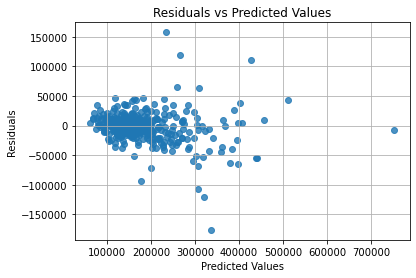

C:\Users\365honeymoon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


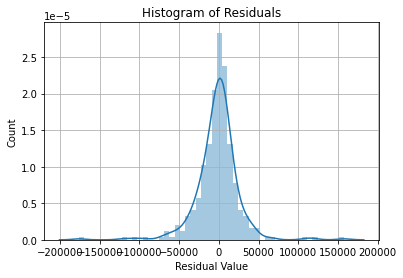

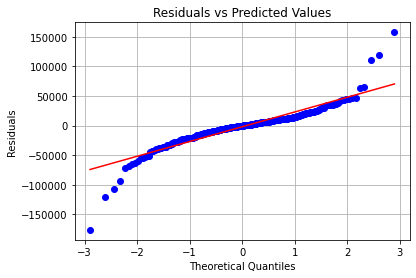

In [280]:
# visualisation of XGBoost model (PricePSF predict/hyperparameter refined)

n = len(X_train)
r2 = r2_score(price_prediction_xgb1_pricepsf,y_test_xgb)
p = len(features)+1

def resid_plot(y_test_xgb,price_prediction_xgb1_pricepsf):
    resids = np.subtract(y_test_xgb,price_prediction_xgb1_pricepsf)
    sns.regplot(price_prediction_xgb1_pricepsf,resids,fit_reg=False)
    plt.grid()
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    
    
def hist_resids(y_test_xgb,price_prediction_xgb1_pricepsf):
    resids = np.subtract(y_test_xgb,price_prediction_xgb1_pricepsf)
    sns.distplot(resids)
    plt.grid()
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Count')
    plt.show()

def resid_qq(y_test_xgb,price_prediction_xgb1_pricepsf):
    resids = np.subtract(y_test_xgb,price_prediction_xgb1_pricepsf)
    stats.probplot(resids,plot=plt)
    plt.grid()
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Residuals')
    plt.show()    

resid_plot(y_test_xgb,price_prediction_xgb1_pricepsf)
hist_resids(y_test_xgb,price_prediction_xgb1_pricepsf)
resid_qq(y_test_xgb,price_prediction_xgb1_pricepsf)

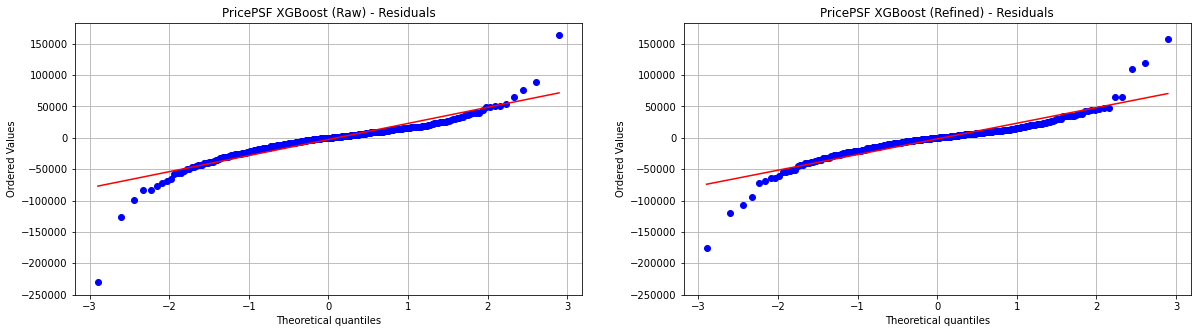

In [431]:
#comparing XGBoost SalePrice predict vs PricePSF predict

fig,axs = plt.subplots(1,2,figsize=(20,5))

ax1 = plt.subplot(121)
res=stats.probplot(np.subtract(y_test_xgb,price_prediction_xgb_pricepsf),plot=plt)
plt.grid()
plt.title('PricePSF XGBoost (Raw) - Residuals')

ax2 = plt.subplot(122,sharey=ax1)
res=stats.probplot(np.subtract(y_test_xgb,price_prediction_xgb1_pricepsf),plot=plt)
plt.grid()
plt.title('PricePSF XGBoost (Refined) - Residuals')

plt.show()

__Comment:__ Most obvious improvement is the outmost negative outlier, which has been markedly reduced.

#### 3.5 Insights/Observations

In [437]:
#summary of results

model_summary

,Median,Mean,StandardDeviation,MeanAbsoluteError,RootMeanSquaredError,RootMeanSquaredLogError,R2Score
RandomForestRaw,486.533596,1058.255998,30071.083669,17696.494229,30089.698881,0.134884,0.829328
RandomForestRefined,546.062103,1211.109438,29266.733365,17672.177916,29291.781577,0.132737,0.838002
XGBoostRaw,880.968750,-393.717145,26921.200773,17392.361066,26924.079636,0.132650,0.888716
XGBoostRefined,1261.109375,-143.587457,26052.280142,16886.103767,26052.675831,0.129988,0.889671
XGBoostRaw(PricePSF),-68.254669,-2754.190497,28010.055467,17513.883667,28145.137636,0.137912,0.890532
XGBoostRefined(PricePSF),-140.639343,-1820.658918,26909.631691,16942.631944,26971.152676,0.134106,0.891192


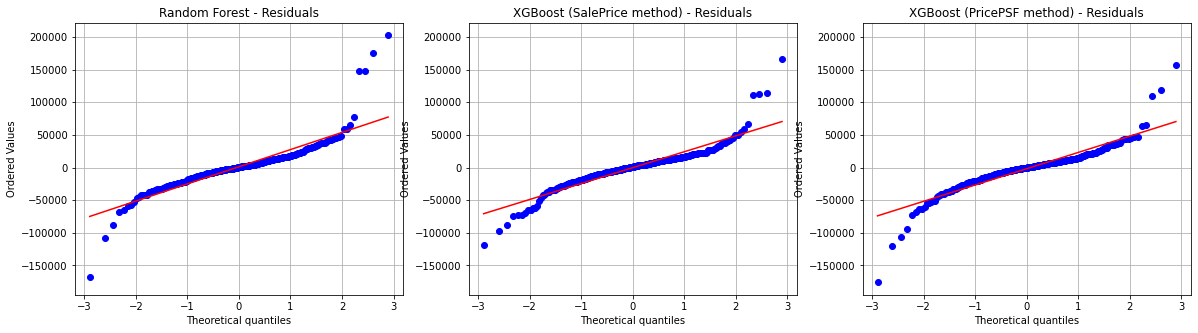

In [433]:
#comparing the 3 models

fig,axs = plt.subplots(1,3,figsize=(20,5))

ax1 = plt.subplot(131)
res=stats.probplot(np.subtract(y_test_rfr,price_prediction_rfr1),plot=plt)
plt.grid()
plt.title('Random Forest - Residuals')

ax2 = plt.subplot(132,sharey=ax1)
res=stats.probplot(np.subtract(y_test_xgb,price_prediction_xgb1),plot=plt)
plt.grid()
plt.title('XGBoost (SalePrice method) - Residuals')

ax3 = plt.subplot(133,sharey=ax1)
res=stats.probplot(np.subtract(y_test_xgb,price_prediction_xgb1_pricepsf),plot=plt)
plt.grid()
plt.title('XGBoost (PricePSF method) - Residuals')

plt.show()

__Comment:__ The performance of all three models between quantiles -2 and 2 are quite similar, and differences are moreso seen in outliers.<br>

A blended model approach will be explored to see if the noise in the extremeties of the residuals can be minimised.

In [438]:
#equal-weighted average of the 3 models

price_prediction_average =np.average((price_prediction_xgb1,price_prediction_xgb1_psf,price_prediction_rfr1),axis=0)

In [439]:
#model validation of blended model

residue_price_prediction_average=np.subtract(y_test_xgb,price_prediction_average)

print('Median of Residuals: %.3f' % np.median(residue_price_prediction_average))
print('Mean of Residuals: %.3f' % np.mean(residue_price_prediction_average))
print('Standard Deviation of Residuals: %.3f' % np.std(residue_price_prediction_average))
print('Mean Absolute Error: %0.5f' % mean_absolute_error(price_prediction_average,y_test_xgb))
print('Root Mean Squared Error: %0.5f' % mean_squared_error(price_prediction_average,y_test_xgb,squared=False))
print('Root Mean Squared Log Error: %0.5f' % np.sqrt(mean_squared_log_error(price_prediction_average,y_test_xgb)))
print ('R2 Score: %0.5f' % r2_score(price_prediction_average,y_test_xgb))

Median of Residuals: 593.176
Mean of Residuals: -251.046
Standard Deviation of Residuals: 25497.857
Mean Absolute Error: 16133.45772
Root Mean Squared Error: 25499.09333
Root Mean Squared Log Error: 0.12425
R2 Score: 0.89057


In [440]:
#add to summary dataframe

## change price_prediction & index_name

index_name = 'BlendedAverage'
price_prediction = price_prediction_average
y_test_result = np.exp(y_test)
residue=np.subtract(y_test_result,price_prediction)

median = np.median(residue)
mean = np.mean(residue)
standard_deviation = np.std(residue)
mae = mean_absolute_error(price_prediction,y_test_result)
rootmsqe = mean_squared_error(price_prediction,y_test_result,squared=False)
rootmsqloge = np.sqrt(mean_squared_log_error(price_prediction,y_test_result))
r2 = r2_score(price_prediction,y_test_result)

result_summary = pd.DataFrame(np.array([median,mean,standard_deviation,mae,rootmsqe,rootmsqloge,r2]).reshape(1,7),
                                       columns=model_summary.columns,
                                       index=[index_name])

model_summary = model_summary.append(result_summary)

model_summary

,Median,Mean,StandardDeviation,MeanAbsoluteError,RootMeanSquaredError,RootMeanSquaredLogError,R2Score
RandomForestRaw,486.533596,1058.255998,30071.083669,17696.494229,30089.698881,0.134884,0.829328
RandomForestRefined,546.062103,1211.109438,29266.733365,17672.177916,29291.781577,0.132737,0.838002
XGBoostRaw,880.968750,-393.717145,26921.200773,17392.361066,26924.079636,0.132650,0.888716
XGBoostRefined,1261.109375,-143.587457,26052.280142,16886.103767,26052.675831,0.129988,0.889671
XGBoostRaw(PricePSF),-68.254669,-2754.190497,28010.055467,17513.883667,28145.137636,0.137912,0.890532
XGBoostRefined(PricePSF),-140.639343,-1820.658918,26909.631691,16942.631944,26971.152676,0.134106,0.891192
BlendedAverage,593.176010,-251.045646,25497.857492,16133.457722,25499.093329,0.124246,0.890569


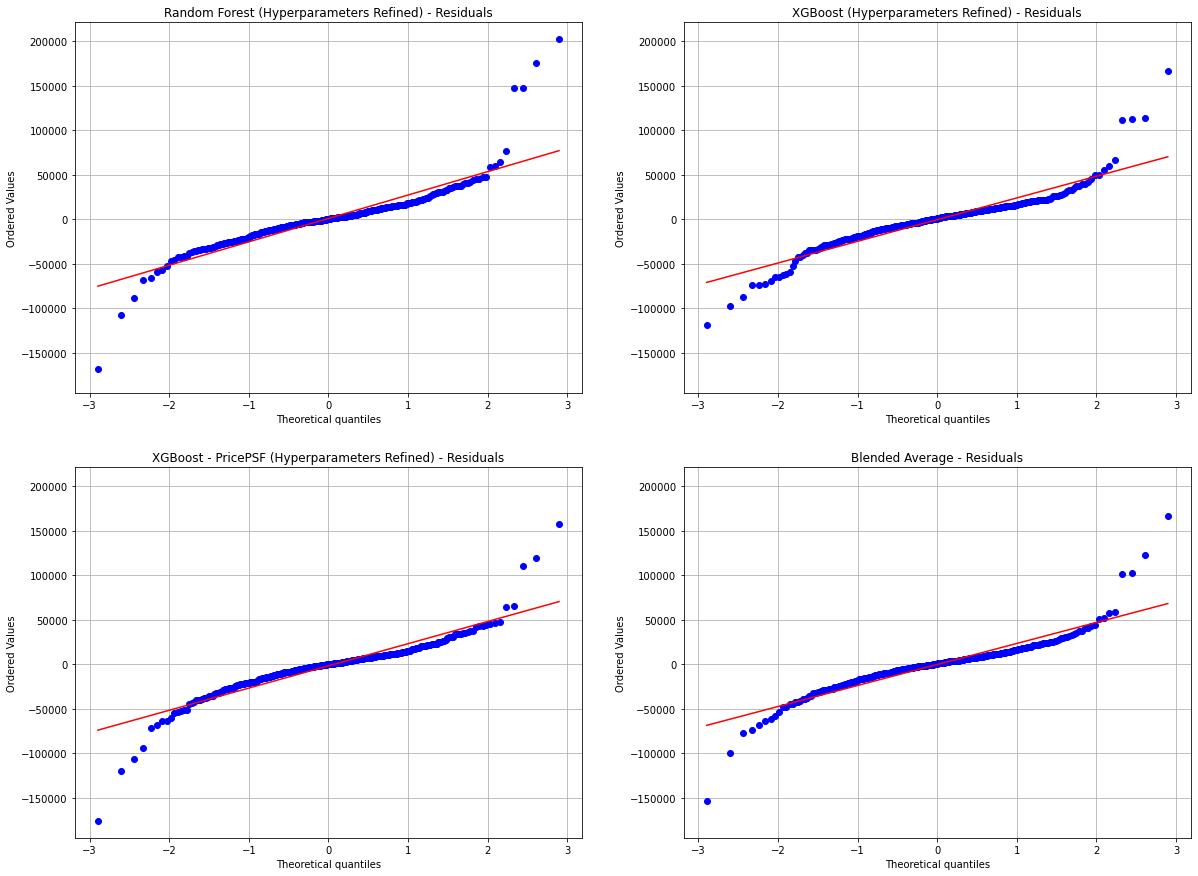

In [445]:
fig,axs = plt.subplots(2,2,figsize=(20,15))

ax1 = plt.subplot(221)
res=stats.probplot(np.subtract(y_test_rfr,price_prediction_rfr1),plot=plt)
plt.grid()
plt.title('Random Forest (Hyperparameters Refined) - Residuals')

ax2 = plt.subplot(222,sharey=ax1)
res=stats.probplot(np.subtract(y_test_xgb,price_prediction_xgb1),plot=plt)
plt.grid()
plt.title('XGBoost (Hyperparameters Refined) - Residuals')

ax3 = plt.subplot(223,sharey=ax1)
res=stats.probplot(np.subtract(y_test_xgb,price_prediction_xgb1_pricepsf),plot=plt)
plt.grid()
plt.title('XGBoost - PricePSF (Hyperparameters Refined) - Residuals')

ax4 = plt.subplot(224,sharey=ax1)
res=stats.probplot(np.subtract(y_test_xgb,price_prediction_average),plot=plt)
plt.grid()
plt.title('Blended Average - Residuals')

plt.show()

__Comment:__ The blended average approach appears to yield favourable results based on model validation metrics.<br>

Looking at the Q-Q plot, the blended average approach appears to have smoothed out the kinks in outlier positions that are more evident in the 3 prior models.<br>

The weightings of the blended average model can likely be refined further to improve predictive capabilities.

C:\Users\365honeymoon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


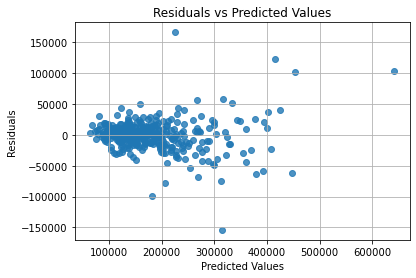

C:\Users\365honeymoon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


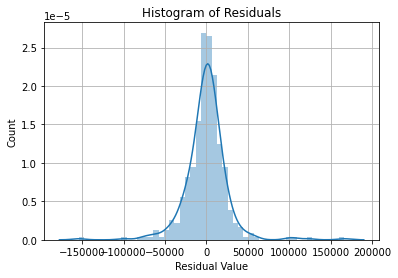

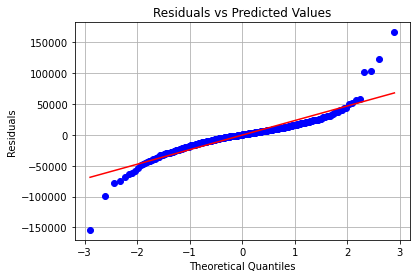

In [446]:
# visualisation of Blended model

n = len(X_train)
r2 = r2_score(price_prediction_average,y_test_xgb)
p = len(features)+1

def resid_plot(y_test_xgb,price_prediction_average):
    resids = np.subtract(y_test_xgb,price_prediction_average)
    sns.regplot(price_prediction_average,resids,fit_reg=False)
    plt.grid()
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    
    
def hist_resids(y_test_xgb,price_prediction_average):
    resids = np.subtract(y_test_xgb,price_prediction_average)
    sns.distplot(resids)
    plt.grid()
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Count')
    plt.show()

def resid_qq(y_test_xgb,price_prediction_average):
    resids = np.subtract(y_test_xgb,price_prediction_average)
    stats.probplot(resids,plot=plt)
    plt.grid()
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Residuals')
    plt.show()    

resid_plot(y_test_xgb,price_prediction_average)
hist_resids(y_test_xgb,price_prediction_average)
resid_qq(y_test_xgb,price_prediction_average)

## 4. Conclusion

A blended model using the predictive outputs of a Random Forest and XGBoost regressor to predict SalePrice, as well as a XGBoost prediction of PricePSF, yielded an R-squared value of 89.2%.<br>
Although the 3 initial models produced similarly favourable results, a blended model was considered as the final solution as it helped to smoothen out biases from these models, and returned the most optimal results in model validation of the test-split data.<br>

Through multiple iterations of refining the models, ultimately there were diminishing returns in (1) tightening the variance of the models, and (2) minimising the residuals of outliers.<br>
This suggests that there is scope for features that have not yet been considered to be added to the model.<br>
Up unto this point, this model has been built without consideration of the geographic characteristics of the town of Ames, or understanding the dynamics of the housing market.<br>
It would make sense that this model can be improved with further insightful data specific to Ames.<br> 

In future, alternative regression models should also be considered to assess if this will help improve model performance.